<a href="https://colab.research.google.com/github/Serran0Juan/finanzas-trabajo-practico-2025/blob/main/PARTEII_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE II**

# 5) Análisis de Tendencias

ANÁLISIS INTEGRAL YPF - ESTRATEGIAS TÉCNICAS
Medias Móviles 50/200, Indicadores de Momentum y Volatilidad

1. DESCARGA/GENERACIÓN DE DATOS DE YPF
----------------------------------------
📅 Intentando descargar YPF desde 2022-08-19 hasta 2025-08-18
✅ Datos reales obtenidos: 750 observaciones
❌ Error descargando datos reales: unsupported format string passed to Series.__format__
🔄 Generando datos simulados realistas...
✅ Datos simulados generados: 782 observaciones
📈 Precio inicial: $15.00
📈 Precio final: $13.84
📊 Retorno total Buy & Hold: -7.7%

2. CÁLCULO DE INDICADORES TÉCNICOS
----------------------------------------
✅ Indicadores calculados. Datos disponibles: 583 observaciones
   • SMA 50/200
   • Bandas de Bollinger
   • RSI
   • MACD

3. GENERANDO SEÑALES DE TRADING
----------------------------------------
✅ Señales generadas:
   • Compras: 12
   • Ventas: 30

4. EJECUTANDO BACKTESTING
----------------------------------------
✅ RESULTADOS DEL BACKTESTING:
------------------------

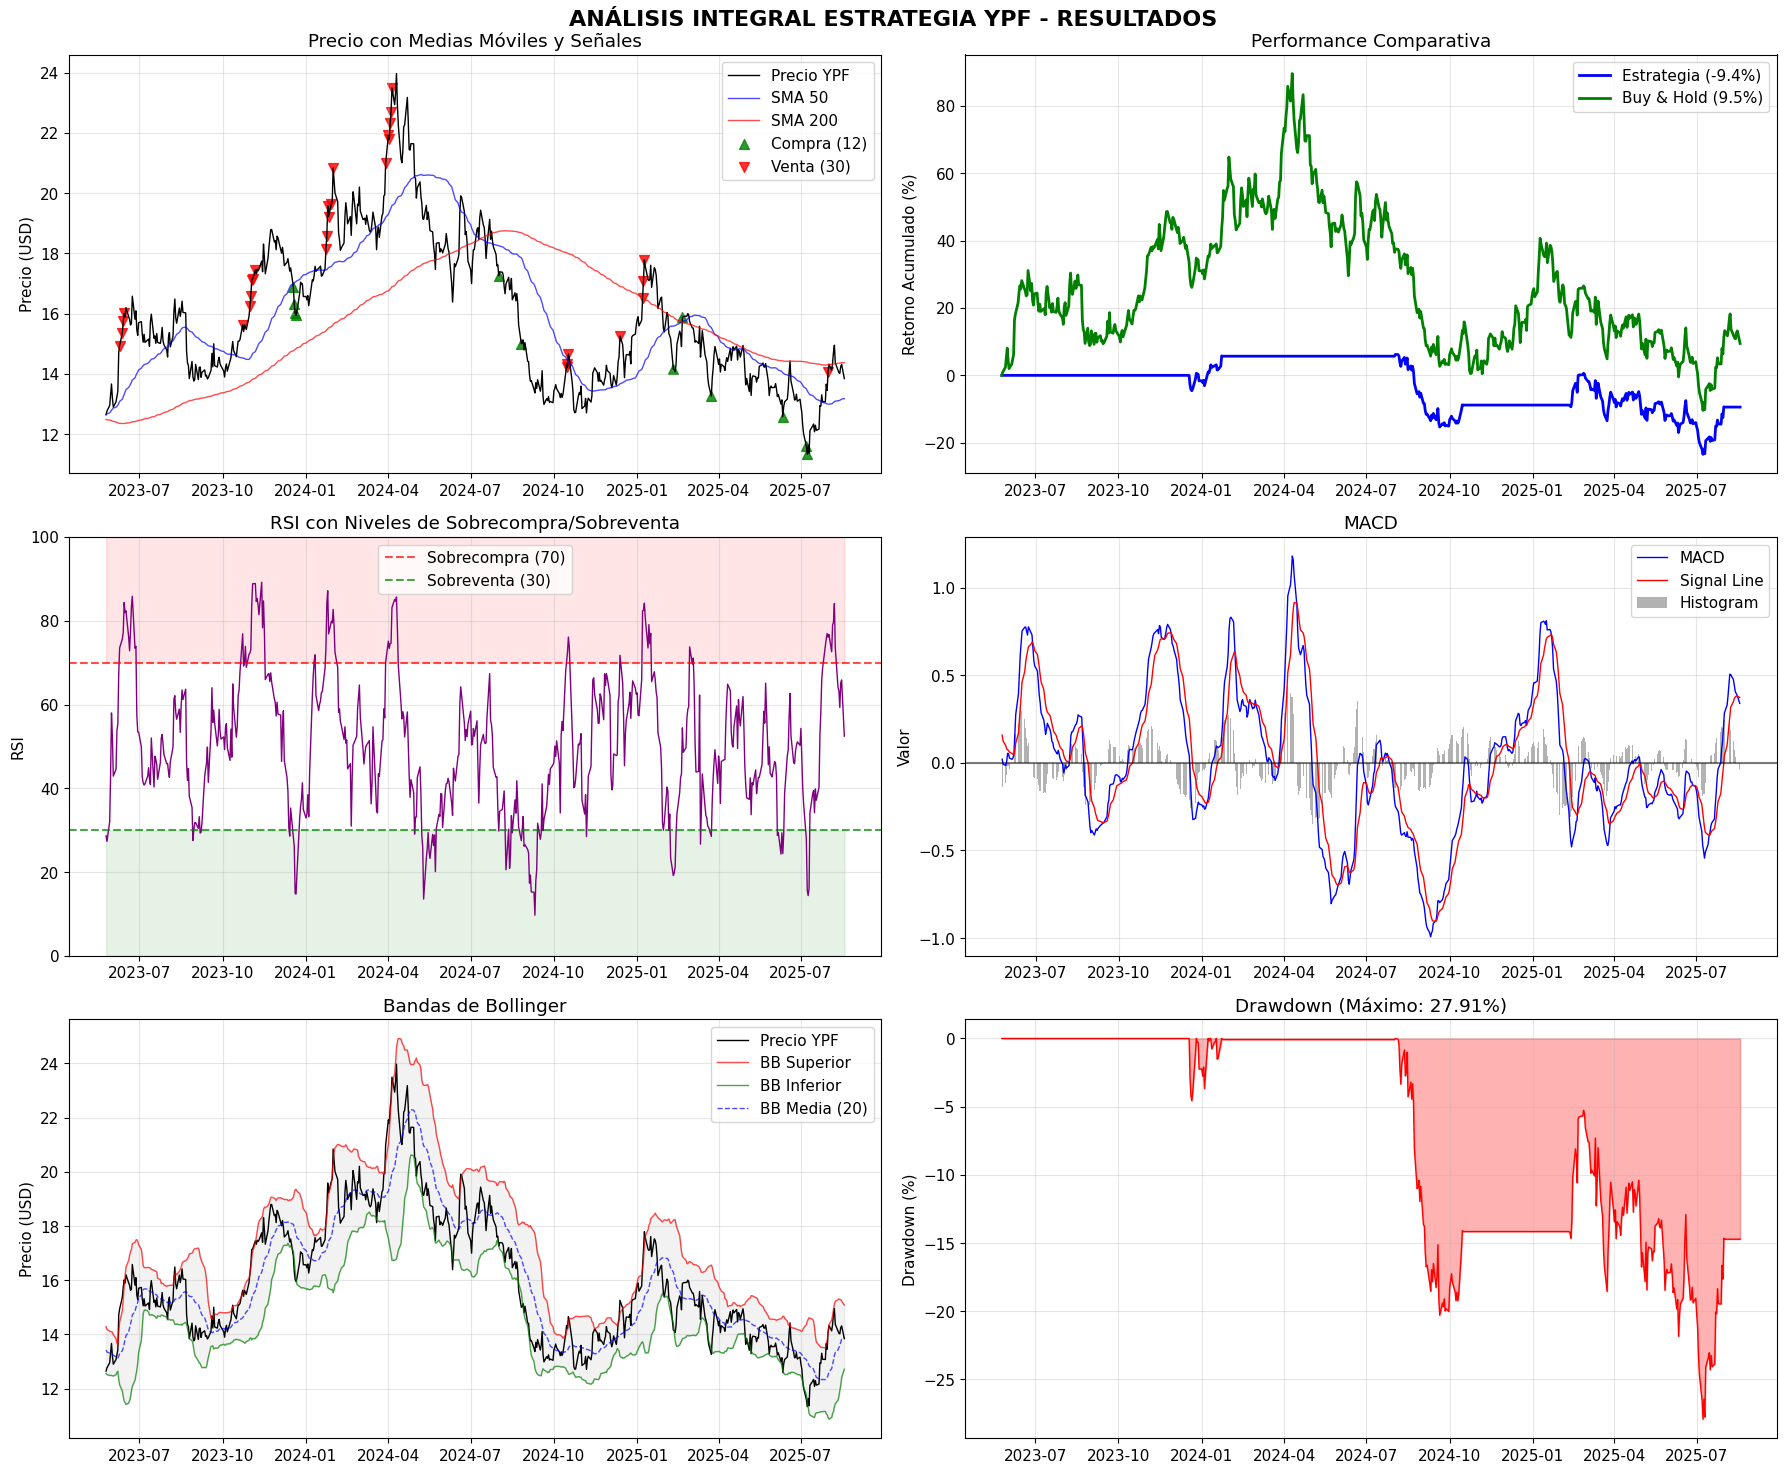


6. EVALUACIÓN FINAL
----------------------------------------
🏆 RESULTADOS GLOBALES DE LA ESTRATEGIA:
   Capital inicial:     $100,000
   Capital final:       $90,585
   Retorno estrategia:  -9.41%
   Retorno Buy & Hold:  +9.47%
   Outperformance:      -18.88%

📊 MÉTRICAS CLAVE:
   Volatilidad anual:   17.62%
   Sharpe Ratio:        -0.325
   Calmar Ratio:        -0.337
   Maximum Drawdown:    27.91%
   Win Rate:            33.3%
   Total trades:        3

💡 ANÁLISIS Y RECOMENDACIONES:
   ❌ La estrategia no superó al Buy & Hold en el período analizado.
   • Se recomienda revisar y optimizar los criterios de señal.
   • Evaluar la combinación de indicadores o probar otros enfoques.
   • Considerar un backtesting más detallado con diferentes parámetros.

📋 PRÓXIMOS PASOS RECOMENDADOS:
   1. Optimizar los parámetros de los indicadores y la lógica de señales.
   2. Implementar gestión de riesgo más avanzada (ej: stop-loss, take-profit).
   3. Realizar backtesting en diferentes períodos de 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

print("=" * 70)
print("ANÁLISIS INTEGRAL YPF - ESTRATEGIAS TÉCNICAS")
print("Medias Móviles 50/200, Indicadores de Momentum y Volatilidad")
print("=" * 70)

# =============================================================================
# 1. OBTENCIÓN DE DATOS REALES O SIMULADOS
# =============================================================================

print("\n1. DESCARGA/GENERACIÓN DE DATOS DE YPF")
print("-" * 40)

# Período de 3 años para análisis robusto
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

print(f"📅 Intentando descargar YPF desde {start_date.strftime('%Y-%m-%d')} hasta {end_date.strftime('%Y-%m-%d')}")

try:
    # Descargar datos reales de YPF
    ypf_data = yf.download('YPF', start=start_date, end=end_date, progress=False)

    if len(ypf_data) == 0:
        raise Exception("No se obtuvieron datos reales")

    # Limpiar datos (solo cerrar para simplificar)
    data = ypf_data[['Close']].dropna().copy()
    print(f"✅ Datos reales obtenidos: {len(data)} observaciones")
    print(f"📊 Rango de precios: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")

except Exception as e:
    print(f"❌ Error descargando datos reales: {e}")
    print("🔄 Generando datos simulados realistas...")

    # Generar datos realistas basados en YPF
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    dates = dates[dates.weekday < 5]  # Solo días hábiles

    np.random.seed(42)
    n_days = len(dates)

    # Precio inicial realista de YPF
    precio_inicial = 15.0

    # Simular movimientos realistas (simplificado)
    returns = np.random.normal(0.0005, 0.025, n_days)
    precios = [precio_inicial]

    for ret in returns[1:]:
        nuevo_precio = precios[-1] * (1 + ret)
        # Mantener precios en rango realista
        nuevo_precio = max(5.0, min(30.0, nuevo_precio))
        precios.append(nuevo_precio)

    data = pd.DataFrame({'Close': precios}, index=dates)

    print(f"✅ Datos simulados generados: {len(data)} observaciones")

print(f"📈 Precio inicial: ${data['Close'].iloc[0]:.2f}")
print(f"📈 Precio final: ${data['Close'].iloc[-1]:.2f}")
print(f"📊 Retorno total Buy & Hold: {((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100:+.1f}%")

# =============================================================================
# 2. CÁLCULO DE INDICADORES TÉCNICOS (Consolidado)
# =============================================================================

print("\n2. CÁLCULO DE INDICADORES TÉCNICOS")
print("-" * 40)

def calculate_all_indicators(df):
    """Calcula todas las medias móviles, Bollinger, RSI, MACD, ADX"""
    df_copy = df.copy() # Trabajar en una copia para evitar SettingWithCopyWarning

    # Medias Móviles
    df_copy['SMA_50'] = df_copy['Close'].rolling(window=50).mean()
    df_copy['SMA_200'] = df_copy['Close'].rolling(window=200).mean()

    # Bandas de Bollinger (usando SMA 20 y 2 desv. estándar)
    window = 20
    std_dev = 2.0
    df_copy['BB_Middle'] = df_copy['Close'].rolling(window=window).mean()
    df_copy['BB_Std'] = df_copy['Close'].rolling(window=window).std()
    df_copy['BB_Upper'] = df_copy['BB_Middle'] + (df_copy['BB_Std'] * std_dev)
    df_copy['BB_Lower'] = df_copy['BB_Middle'] - (df_copy['BB_Std'] * std_dev)
    df_copy['BB_Width'] = (df_copy['BB_Upper'] - df_copy['BB_Lower']) / df_copy['BB_Middle'] * 100
    df_copy['BB_Position'] = (df_copy['Close'] - df_copy['BB_Lower']) / (df_copy['BB_Upper'] - df_copy['BB_Lower']) * 100

    # RSI
    delta = df_copy['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df_copy['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema_short = df_copy['Close'].ewm(span=12, adjust=False).mean()
    ema_long = df_copy['Close'].ewm(span=26, adjust=False).mean()
    df_copy['MACD'] = ema_short - ema_long
    df_copy['MACD_Signal'] = df_copy['MACD'].ewm(span=9, adjust=False).mean()
    df_copy['MACD_Histogram'] = df_copy['MACD'] - df_copy['MACD_Signal']

    # ADX (simplificado)
    # Requires High/Low, using Close for simplicity in this consolidated function
    # For a full ADX, need original OHLC data. Assuming Close-based approx for now.
    # A more accurate ADX would need High/Low in the input df.
    # Placeholder for ADX if OHLC is available
    # df_copy['ADX'] = ...

    # Limpiar NaNs generados por rolling windows
    df_copy = df_copy.dropna()

    return df_copy

data_with_indicators = calculate_all_indicators(data)

print(f"✅ Indicadores calculados. Datos disponibles: {len(data_with_indicators)} observaciones")
print("   • SMA 50/200")
print("   • Bandas de Bollinger")
print("   • RSI")
print("   • MACD")

# =============================================================================
# 3. ESTRATEGIA DE TRADING (Consolidada y Simplificada)
# =============================================================================

print("\n3. GENERANDO SEÑALES DE TRADING")
print("-" * 40)

def generate_integrated_signals(df):
    """Genera señales de compra/venta basadas en múltiples indicadores"""
    df_copy = df.copy()
    df_copy['Signal'] = 0

    # Lógica simplificada: Golden Cross + RSI + MACD
    for i in range(1, len(df_copy)):
        # Golden Cross (Compra)
        if (df_copy['SMA_50'].iloc[i] > df_copy['SMA_200'].iloc[i] and
            df_copy['SMA_50'].iloc[i-1] <= df_copy['SMA_200'].iloc[i-1]):
            # Confirmación con RSI y MACD (ejemplo)
            if df_copy['RSI'].iloc[i] > 50 and df_copy['MACD'].iloc[i] > df_copy['MACD_Signal'].iloc[i]:
                 df_copy.loc[df_copy.index[i], 'Signal'] = 1

        # Death Cross (Venta)
        elif (df_copy['SMA_50'].iloc[i] < df_copy['SMA_200'].iloc[i] and
              df_copy['SMA_50'].iloc[i-1] >= df_copy['SMA_200'].iloc[i-1]):
             # Confirmación con RSI y MACD (ejemplo)
            if df_copy['RSI'].iloc[i] < 50 and df_copy['MACD'].iloc[i] < df_copy['MACD_Signal'].iloc[i]:
                df_copy.loc[df_copy.index[i], 'Signal'] = -1

        # Señales basadas en Bollinger (ejemplo: rebote en bandas)
        if df_copy['Close'].iloc[i] < df_copy['BB_Lower'].iloc[i] and df_copy['RSI'].iloc[i] < 30:
             df_copy.loc[df_copy.index[i], 'Signal'] = 1 # Compra por sobreventa/rebote

        elif df_copy['Close'].iloc[i] > df_copy['BB_Upper'].iloc[i] and df_copy['RSI'].iloc[i] > 70:
             df_copy.loc[df_copy.index[i], 'Signal'] = -1 # Venta por sobrecompra/rebote


    return df_copy

data_with_signals = generate_integrated_signals(data_with_indicators)

buy_signals = data_with_signals[data_with_signals['Signal'] == 1]
sell_signals = data_with_signals[data_with_signals['Signal'] == -1]

print(f"✅ Señales generadas:")
print(f"   • Compras: {len(buy_signals)}")
print(f"   • Ventas: {len(sell_signals)}")


# =============================================================================
# 4. BACKTESTING ROBUSTO (Consolidado)
# =============================================================================

print("\n4. EJECUTANDO BACKTESTING")
print("-" * 40)

def execute_unified_backtest(df, initial_capital=100000):
    """Backtesting unificado para cualquier estrategia con columna 'Signal'"""

    capital = initial_capital
    shares = 0
    position = 0  # 0: cash, 1: long

    trades = []
    portfolio_values = []

    for i, (date, row) in enumerate(df.iterrows()):
        price = row['Close']
        signal = row['Signal']

        # Valor actual del portfolio
        if position == 1:
            portfolio_value = capital + (shares * price)
        else:
            portfolio_value = capital

        portfolio_values.append(portfolio_value)

        # Ejecutar trades
        if signal == 1 and position == 0:  # Señal de compra
            # Usar un porcentaje fijo del capital para simplificar
            investment_pct = 0.8 # Invertir 80% del capital disponible

            investment = capital * investment_pct
            shares = investment / (price * 1.001)  # Incluir costos (0.1%)
            capital = capital - investment
            position = 1

            trades.append({
                'date': date,
                'action': 'BUY',
                'price': price,
                'shares': shares
            })

        elif signal == -1 and position == 1:  # Señal de venta
            proceeds = shares * price * 0.999  # Incluir costos (0.1%)
            capital = capital + proceeds

            # Calcular P&L del trade
            if trades and trades[-1]['action'] == 'BUY':
                entry_price = trades[-1]['price']
                trade_return = (price / entry_price - 1) * 100
            else:
                trade_return = 0

            shares = 0
            position = 0

            trades.append({
                'date': date,
                'action': 'SELL',
                'price': price,
                'return_pct': trade_return
            })

    # Cerrar posición final si está abierta
    if position == 1:
        final_price = df['Close'].iloc[-1]
        proceeds = shares * final_price * 0.999
        capital = capital + proceeds

        if trades and trades[-1]['action'] == 'BUY':
            entry_price = trades[-1]['price']
            trade_return = (final_price / entry_price - 1) * 100

            trades.append({
                'date': df.index[-1],
                'action': 'SELL_FINAL',
                'price': final_price,
                'return_pct': trade_return
            })

    final_value = portfolio_values[-1] if portfolio_values else initial_capital


    return {
        'portfolio_values': portfolio_values,
        'trades': trades,
        'final_value': final_value,
        'initial_capital': initial_capital
    }

# Ejecutar backtest
backtest_results = execute_unified_backtest(data_with_signals)

# Calcular métricas
portfolio_values = backtest_results['portfolio_values']
initial_capital = backtest_results['initial_capital']
final_value = backtest_results['final_value']

total_return = (final_value / initial_capital - 1) * 100
# Calcular Buy & Hold solo en el período con indicadores válidos
bh_start_price = data_with_signals['Close'].iloc[0]
bh_end_price = data_with_signals['Close'].iloc[-1]
bh_return = (bh_end_price / bh_start_price - 1) * 100
outperformance = total_return - bh_return

# Calcular retornos diarios para métricas de riesgo
daily_returns = pd.Series(portfolio_values).pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252) * 100 if not daily_returns.empty else 0

# Sharpe Ratio
risk_free_rate = 0.03 / 252 # Tasa diaria
sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std() * np.sqrt(252) if volatility > 0 else 0

# Maximum Drawdown
cumulative = pd.Series(portfolio_values)
running_max = cumulative.expanding().max()
drawdowns = (cumulative - running_max) / running_max
max_drawdown = abs(drawdowns.min()) * 100 if not drawdowns.empty else 0

# Calmar Ratio
calmar_ratio = (total_return / max_drawdown) if max_drawdown > 0 else 0

# Estadísticas de trading
trades_with_returns = [t for t in backtest_results['trades'] if 'return_pct' in t]
if trades_with_returns:
    winning_trades = len([t for t in trades_with_returns if t['return_pct'] > 0])
    total_trades = len(trades_with_returns)
    win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
    avg_trade_return = np.mean([t['return_pct'] for t in trades_with_returns])
else:
    win_rate = 0
    avg_trade_return = 0
    total_trades = 0


print("✅ RESULTADOS DEL BACKTESTING:")
print("-" * 40)
print(f"💰 RETORNOS:")
print(f"   Capital inicial:     ${initial_capital:,}")
print(f"   Capital final:       ${final_value:,.0f}")
print(f"   Retorno estrategia:  {total_return:+.2f}%")
print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
print(f"   Outperformance:      {outperformance:+.2f}%")

print(f"\n📊 MÉTRICAS DE RIESGO:")
print(f"   Volatilidad anual:   {volatility:.2f}%")
print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
print(f"   Calmar Ratio:        {calmar_ratio:.3f}")
print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")

print(f"\n🎯 ESTADÍSTICAS DE TRADING:")
print(f"   Total trades:        {total_trades}")
print(f"   Win Rate:            {win_rate:.1f}%")
print(f"   Retorno avg/trade:   {avg_trade_return:+.2f}%")

# =============================================================================
# 5. VISUALIZACIONES (Consolidada)
# =============================================================================

print("\n5. GENERANDO VISUALIZACIONES")
print("-" * 40)

# Crear figura principal
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('ANÁLISIS INTEGRAL ESTRATEGIA YPF - RESULTADOS', fontsize=16, fontweight='bold')

# 1. Precio con señales y Medias Móviles
ax1 = axes[0, 0]
ax1.plot(data_with_signals.index, data_with_signals['Close'], 'k-', linewidth=1, label='Precio YPF')
ax1.plot(data_with_signals.index, data_with_signals['SMA_50'], 'b-', alpha=0.7, linewidth=1, label='SMA 50')
ax1.plot(data_with_signals.index, data_with_signals['SMA_200'], 'r-', alpha=0.7, linewidth=1, label='SMA 200')

# Señales
buy_signals_plot = data_with_signals[data_with_signals['Signal'] == 1]
sell_signals_plot = data_with_signals[data_with_signals['Signal'] == -1]

if len(buy_signals_plot) > 0:
    ax1.scatter(buy_signals_plot.index, buy_signals_plot['Close'],
                color='green', s=50, marker='^', alpha=0.8, label=f'Compra ({len(buy_signals_plot)})')
if len(sell_signals_plot) > 0:
    ax1.scatter(sell_signals_plot.index, sell_signals_plot['Close'],
                color='red', s=50, marker='v', alpha=0.8, label=f'Venta ({len(sell_signals_plot)})')

ax1.set_title('Precio con Medias Móviles y Señales')
ax1.set_ylabel('Precio (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)


# 2. Performance comparativa
ax2 = axes[0, 1]
strategy_curve = [(pv / initial_capital - 1) * 100 for pv in portfolio_values]
# Asegurar que la curva de Buy & Hold tenga el mismo índice que la estrategia
bh_curve_data = data_with_signals['Close']
bh_curve = [(bh_curve_data.iloc[i] / bh_curve_data.iloc[0] - 1) * 100
            for i in range(len(bh_curve_data))]

ax2.plot(data_with_signals.index, strategy_curve, 'b-', linewidth=2,
         label=f'Estrategia ({total_return:.1f}%)')
ax2.plot(data_with_signals.index, bh_curve, 'g-', linewidth=2,
         label=f'Buy & Hold ({bh_return:.1f}%)')

ax2.set_title('Performance Comparativa')
ax2.set_ylabel('Retorno Acumulado (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. RSI con niveles
ax3 = axes[1, 0]
ax3.plot(data_with_signals.index, data_with_signals['RSI'], 'purple', linewidth=1)
ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Sobreventa (30)')
ax3.fill_between(data_with_signals.index, 70, 100, alpha=0.1, color='red')
ax3.fill_between(data_with_signals.index, 0, 30, alpha=0.1, color='green')

ax3.set_title('RSI con Niveles de Sobrecompra/Sobreventa')
ax3.set_ylabel('RSI')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. MACD
ax4 = axes[1, 1]
ax4.plot(data_with_signals.index, data_with_signals['MACD'], 'b-', linewidth=1, label='MACD')
ax4.plot(data_with_signals.index, data_with_signals['MACD_Signal'], 'r-', linewidth=1, label='Signal Line')
ax4.bar(data_with_signals.index, data_with_signals['MACD_Histogram'], color='gray', alpha=0.6, label='Histogram')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5)

ax4.set_title('MACD')
ax4.set_ylabel('Valor')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Bandas de Bollinger
ax5 = axes[2, 0]
ax5.plot(data_with_signals.index, data_with_signals['Close'], 'k-', linewidth=1, label='Precio YPF')
ax5.plot(data_with_signals.index, data_with_signals['BB_Upper'], 'r-', alpha=0.7, linewidth=1, label='BB Superior')
ax5.plot(data_with_signals.index, data_with_signals['BB_Lower'], 'g-', alpha=0.7, linewidth=1, label='BB Inferior')
ax5.plot(data_with_signals.index, data_with_signals['BB_Middle'], 'b--', alpha=0.7, linewidth=1, label='BB Media (20)')
ax5.fill_between(data_with_signals.index, data_with_signals['BB_Upper'], data_with_signals['BB_Lower'],
                 alpha=0.1, color='gray')

ax5.set_title('Bandas de Bollinger')
ax5.set_ylabel('Precio (USD)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Drawdown
ax6 = axes[2, 1]
# Asegurar que el drawdown tenga el mismo índice que el portfolio_values
drawdown_pct = drawdowns * 100
ax6.fill_between(data_with_signals.index, 0, drawdown_pct, color='red', alpha=0.3)
ax6.plot(data_with_signals.index, drawdown_pct, 'r-', linewidth=1)
ax6.set_title(f'Drawdown (Máximo: {max_drawdown:.2f}%)')
ax6.set_ylabel('Drawdown (%)')
ax6.grid(True, alpha=0.3)


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# =============================================================================
# 6. EVALUACIÓN FINAL Y RECOMENDACIONES (Consolidada)
# =============================================================================

print("\n6. EVALUACIÓN FINAL")
print("-" * 40)

print(f"🏆 RESULTADOS GLOBALES DE LA ESTRATEGIA:")
print(f"   Capital inicial:     ${initial_capital:,}")
print(f"   Capital final:       ${final_value:,.0f}")
print(f"   Retorno estrategia:  {total_return:+.2f}%")
print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
print(f"   Outperformance:      {outperformance:+.2f}%")

print(f"\n📊 MÉTRICAS CLAVE:")
print(f"   Volatilidad anual:   {volatility:.2f}%")
print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
print(f"   Calmar Ratio:        {calmar_ratio:.3f}")
print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")
print(f"   Win Rate:            {win_rate:.1f}%")
print(f"   Total trades:        {total_trades}")

print(f"\n💡 ANÁLISIS Y RECOMENDACIONES:")
if outperformance > 0:
    print("   ✅ La estrategia superó al Buy & Hold en el período analizado.")
    if sharpe_ratio > 0.5:
         print("   ✅ La relación riesgo-retorno es aceptable.")
    else:
         print("   ⚠️  Considerar mejorar la relación riesgo-retorno (Sharpe Ratio bajo).")
    if max_drawdown < 20:
         print("   ✅ El Drawdown máximo está bajo control.")
    else:
         print("   ⚠️  El Drawdown máximo es significativo. Evaluar gestión de riesgo.")
    if win_rate > 50:
         print("   ✅ La estrategia tiene una tasa de acierto positiva.")
    else:
         print("   ⚠️  La tasa de acierto es baja. Revisar criterios de señal.")

else:
    print("   ❌ La estrategia no superó al Buy & Hold en el período analizado.")
    print("   • Se recomienda revisar y optimizar los criterios de señal.")
    print("   • Evaluar la combinación de indicadores o probar otros enfoques.")
    print("   • Considerar un backtesting más detallado con diferentes parámetros.")


print(f"\n📋 PRÓXIMOS PASOS RECOMENDADOS:")
print("   1. Optimizar los parámetros de los indicadores y la lógica de señales.")
print("   2. Implementar gestión de riesgo más avanzada (ej: stop-loss, take-profit).")
print("   3. Realizar backtesting en diferentes períodos de mercado.")
print("   4. Considerar la validación fuera de la muestra (out-of-sample testing).")
print("   5. Integrar análisis fundamental o macroeconómico si es relevante.")


print("\n" + "=" * 70)
print("✅ ANÁLISIS INTEGRAL COMPLETADO")
print(f"📊 Performance vs Buy & Hold: {outperformance:+.2f}%")
print("=" * 70)

# 6) Indicadores de Momentum

🚀 Iniciando análisis completo de momentum para YPF...
📊 Descargando datos de YPF (3y)...
✅ Datos obtenidos: 753 observaciones
📅 Período: 2022-08-16 a 2025-08-15
💰 Precio actual: $32.97 USD
📈 Rango: $4.61 - $46.03 USD
📈 Calculando indicadores técnicos...
✅ Indicadores calculados exitosamente
🔍 Analizando divergencias...
📊 Divergencias encontradas:
   • MACD: 0 (0 alcistas, 0 bajistas)
   • RSI: 3 (1 alcistas, 2 bajistas)
   • Total: 1 alcistas, 2 bajistas
🔧 Optimizando parámetros...
✅ Optimización completada
🏆 Mejores parámetros:
   • MACD: (8, 20)
   • RSI: 10 períodos
   • ADX: threshold 30
   • Score: -161.47
📈 Calculando indicadores técnicos...
✅ Indicadores calculados exitosamente
⚡ Generando señales de trading...
✅ Señales generadas: 176 compras, 93 ventas
💰 Ejecutando backtest con capital inicial: $100,000
✅ Backtest completado:
   • Retorno estrategia: 92.65%
   • Retorno Buy & Hold: 429.21%
   • Outperformance: -336.56%
   • Número de trades: 49


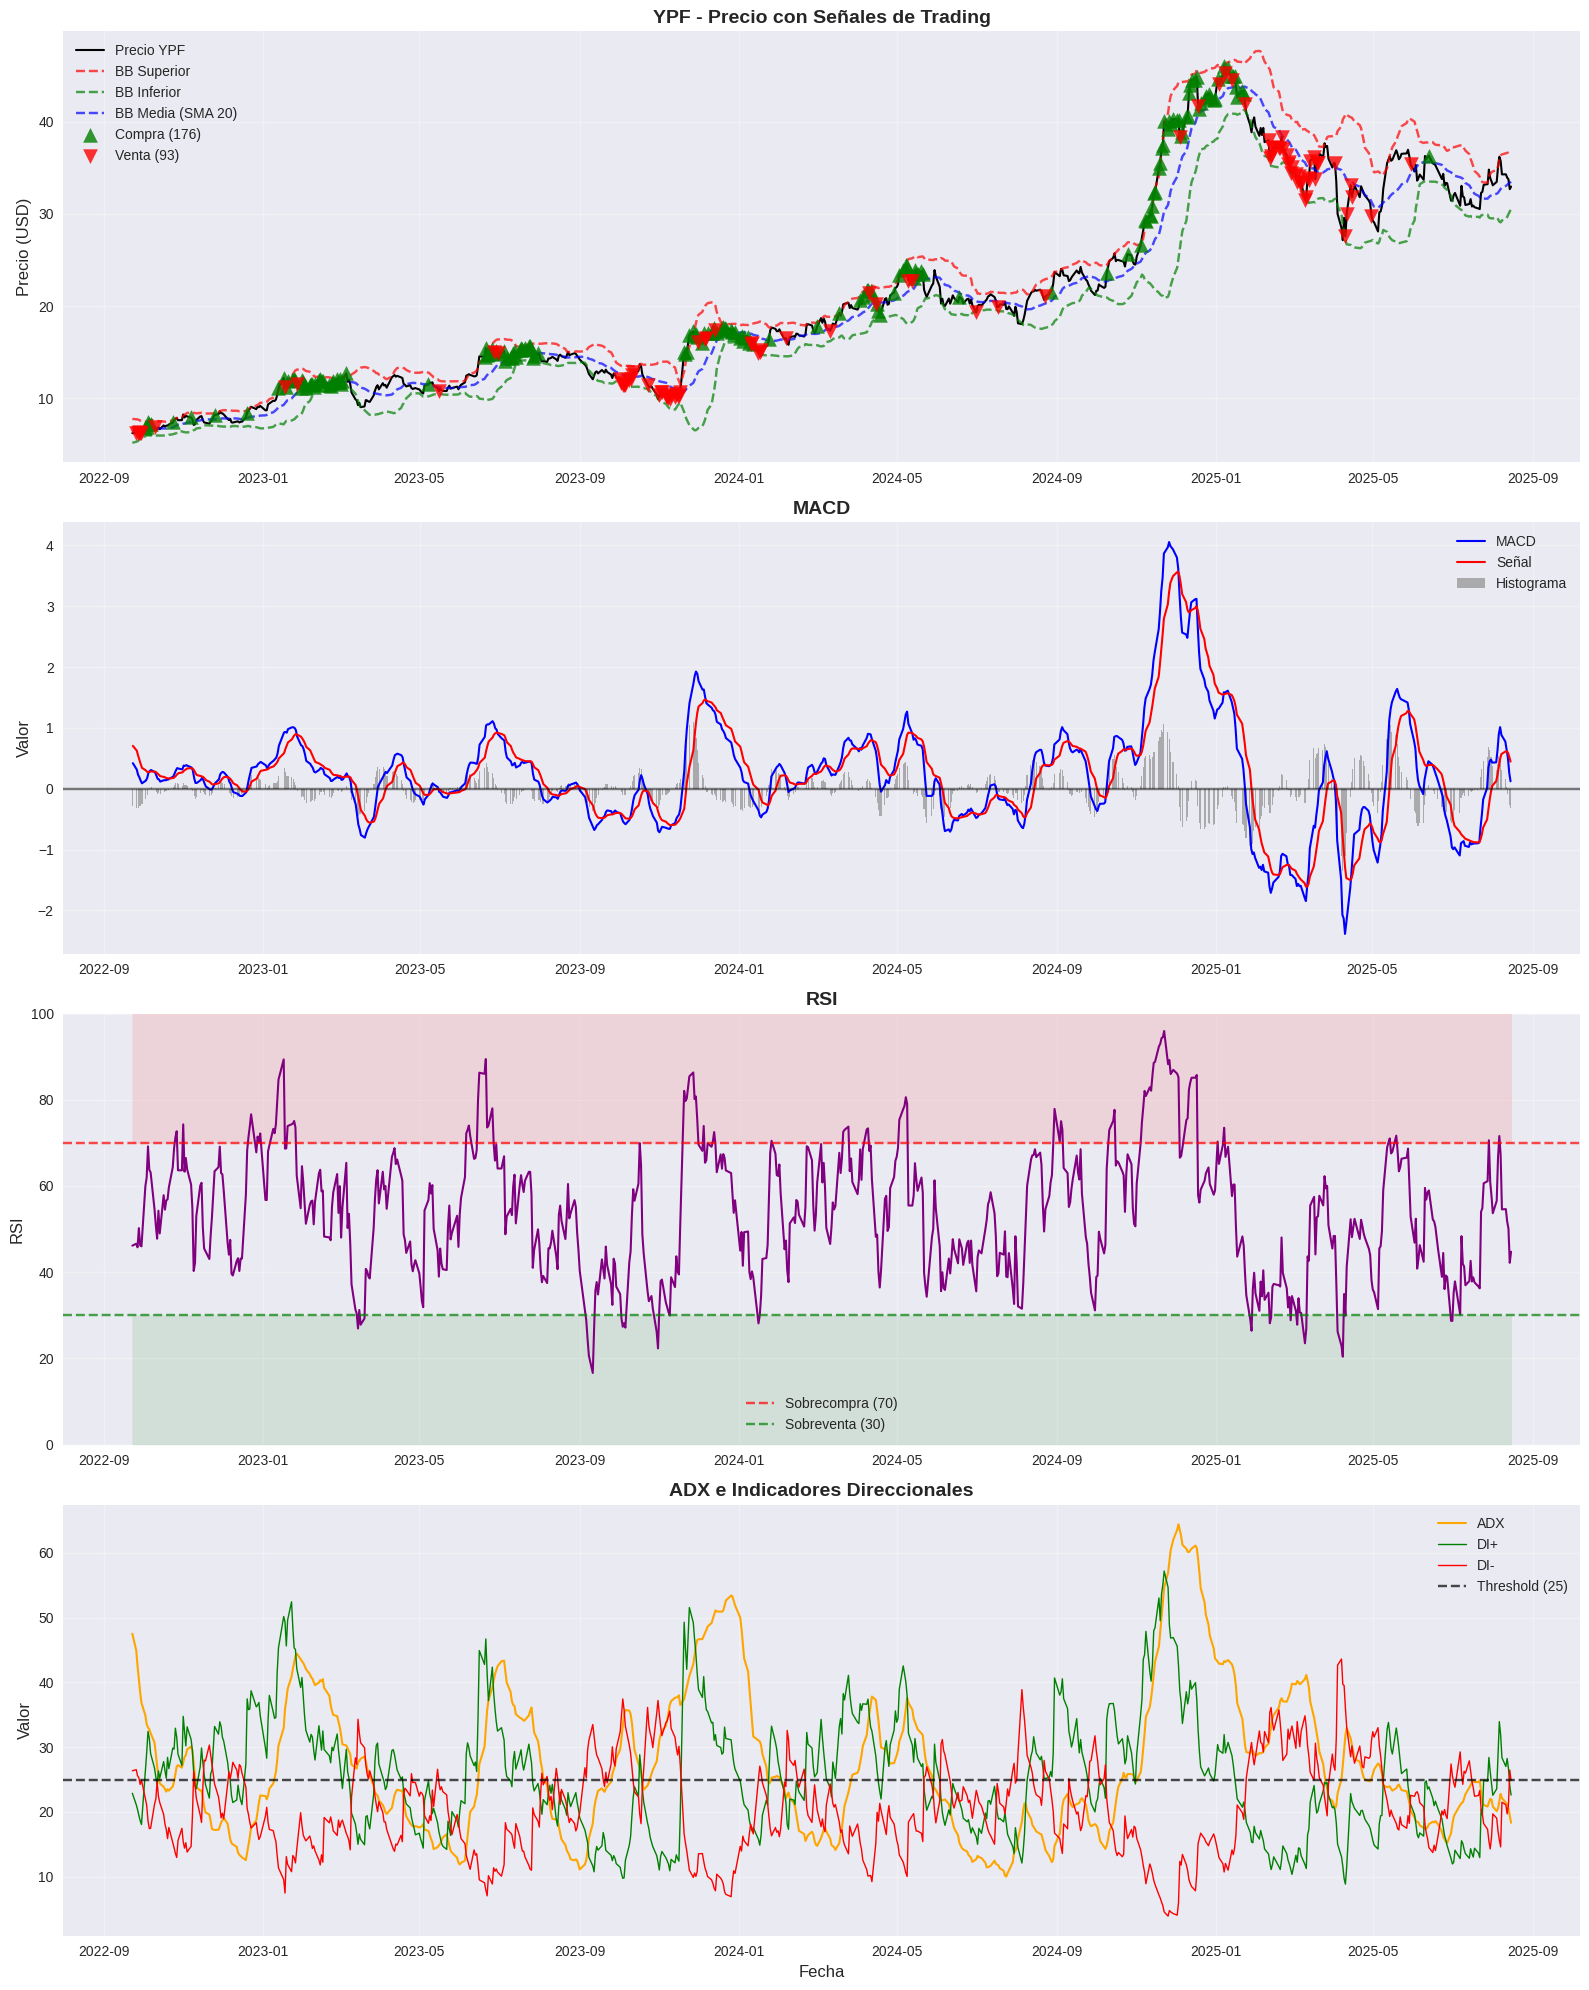

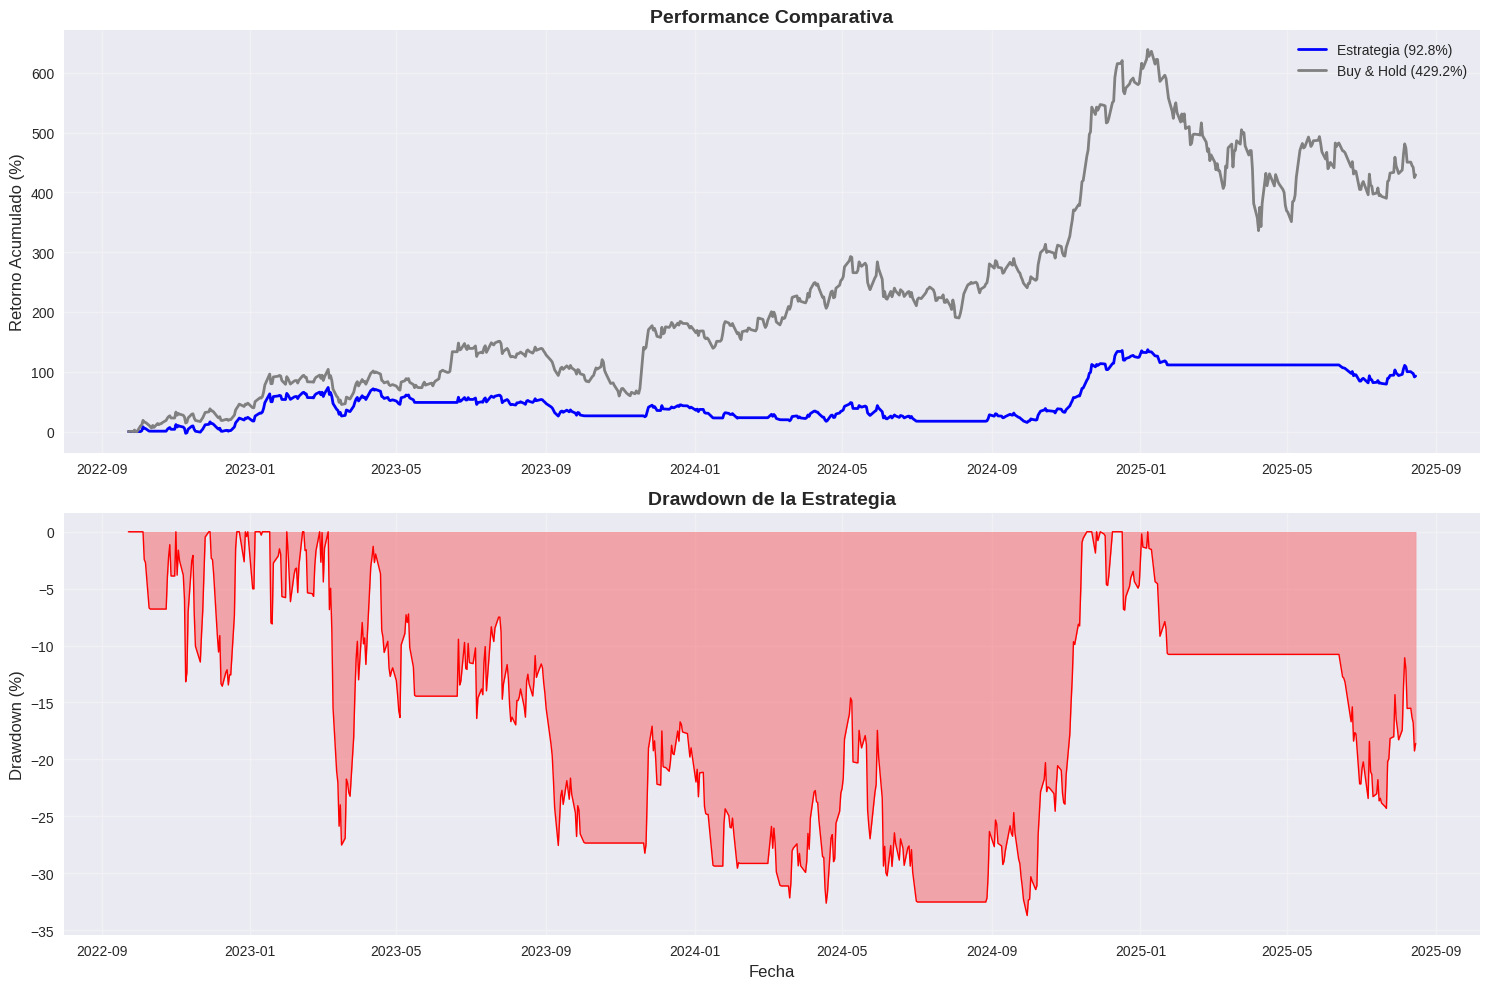


📊 RESUMEN COMPLETO DEL ANÁLISIS DE MOMENTUM - YPF

💰 RENDIMIENTO:
   Capital inicial:     $100,000
   Capital final:       $192,650
   Retorno estrategia:  +92.65%
   Retorno Buy & Hold:  +429.21%
   Outperformance:      -336.56%

📈 MÉTRICAS DE RIESGO:
   Volatilidad anual:   38.14%
   Sharpe Ratio:        0.709
   Maximum Drawdown:    33.72%

🎯 TRADING:
   Número de trades:    49
   Señales de compra:   25
   Señales de venta:    24

🏆 EVALUACIÓN FINAL:
   Puntuación:          40/100
   Calificación:        🟠 ACEPTABLE


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
from scipy.optimize import minimize
import seaborn as sns

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10

class MomentumAnalyzer:
    def __init__(self, symbol='YPF', period='5y'):
        """
        Inicializar el analizador de momentum

        Args:
            symbol: Ticker del activo (YPF para ADR en USD)
            period: Período de datos ('1y', '2y', '5y', etc.)
        """
        self.symbol = symbol
        self.period = period
        self.data = None
        self.signals_df = None
        self.backtest_results = None

    def download_data(self):
        """Descargar datos reales de YPF en USD"""
        print(f"📊 Descargando datos de {self.symbol} ({self.period})...")

        try:
            # YPF cotiza en NYSE como ADR en USD
            ticker = yf.Ticker(self.symbol)
            self.data = ticker.history(period=self.period)

            if self.data.empty:
                raise ValueError(f"No se obtuvieron datos para {self.symbol}")

            # Limpiar datos
            self.data = self.data.dropna()

            # Información básica
            print(f"✅ Datos obtenidos: {len(self.data)} observaciones")
            print(f"📅 Período: {self.data.index[0].strftime('%Y-%m-%d')} a {self.data.index[-1].strftime('%Y-%m-%d')}")
            print(f"💰 Precio actual: ${self.data['Close'].iloc[-1]:.2f} USD")
            print(f"📈 Rango: ${self.data['Close'].min():.2f} - ${self.data['Close'].max():.2f} USD")

            return True

        except Exception as e:
            print(f"❌ Error descargando datos: {e}")
            return False

    def calculate_ema(self, values, period):
        """Calcular EMA optimizada"""
        values = np.array(values, dtype=float)
        result = np.full_like(values, np.nan)

        if len(values) >= period:
            # Inicializar con SMA
            result[period-1] = np.mean(values[:period])

            # Factor de suavizado
            alpha = 2.0 / (period + 1.0)

            # Calcular EMA
            for i in range(period, len(values)):
                result[i] = alpha * values[i] + (1 - alpha) * result[i-1]

        return result

    def calculate_macd(self, closes, fast=12, slow=26, signal=9):
        """Calcular MACD con parámetros personalizables"""
        ema_fast = self.calculate_ema(closes, fast)
        ema_slow = self.calculate_ema(closes, slow)

        macd_line = ema_fast - ema_slow

        # Calcular línea de señal
        valid_macd = macd_line[~np.isnan(macd_line)]
        if len(valid_macd) >= signal:
            signal_line_values = self.calculate_ema(valid_macd, signal)

            # Alinear con el array completo
            signal_line = np.full_like(macd_line, np.nan)
            valid_indices = np.where(~np.isnan(macd_line))[0]

            if len(signal_line_values) <= len(valid_indices):
                signal_line[valid_indices[-len(signal_line_values):]] = signal_line_values
        else:
            signal_line = np.full_like(macd_line, np.nan)

        histogram = macd_line - signal_line

        return macd_line, signal_line, histogram

    def calculate_rsi(self, closes, period=14):
        """Calcular RSI mejorado"""
        closes = np.array(closes, dtype=float)
        deltas = np.diff(closes)

        gains = np.where(deltas > 0, deltas, 0)
        losses = np.where(deltas < 0, -deltas, 0)

        rsi = np.full(len(closes), np.nan)

        if len(gains) >= period:
            # Primer cálculo con SMA
            avg_gain = np.mean(gains[:period])
            avg_loss = np.mean(losses[:period])

            if avg_loss == 0:
                rsi[period] = 100
            else:
                rs = avg_gain / avg_loss
                rsi[period] = 100 - (100 / (1 + rs))

            # Continuar con suavizado Wilder
            for i in range(period + 1, len(closes)):
                avg_gain = (avg_gain * (period - 1) + gains[i-1]) / period
                avg_loss = (avg_loss * (period - 1) + losses[i-1]) / period

                if avg_loss == 0:
                    rsi[i] = 100
                else:
                    rs = avg_gain / avg_loss
                    rsi[i] = 100 - (100 / (1 + rs))

        return rsi

    def calculate_adx(self, highs, lows, closes, period=14):
        """Calcular ADX (Average Directional Index)"""
        n = len(highs)

        # True Range
        tr = np.full(n, np.nan)
        for i in range(1, n):
            hl = highs[i] - lows[i]
            hc = abs(highs[i] - closes[i-1])
            lc = abs(lows[i] - closes[i-1])
            tr[i] = max(hl, hc, lc)

        # Directional Movement
        dm_plus = np.full(n, np.nan)
        dm_minus = np.full(n, np.nan)

        for i in range(1, n):
            up_move = highs[i] - highs[i-1]
            down_move = lows[i-1] - lows[i]

            dm_plus[i] = up_move if up_move > down_move and up_move > 0 else 0
            dm_minus[i] = down_move if down_move > up_move and down_move > 0 else 0

        # Suavizado Wilder
        atr = np.full(n, np.nan)
        dm_plus_smooth = np.full(n, np.nan)
        dm_minus_smooth = np.full(n, np.nan)

        if period < n:
            # Inicializar con promedio
            atr[period] = np.nanmean(tr[1:period+1])
            dm_plus_smooth[period] = np.nanmean(dm_plus[1:period+1])
            dm_minus_smooth[period] = np.nanmean(dm_minus[1:period+1])

            # Continuar suavizado
            for i in range(period + 1, n):
                atr[i] = (atr[i-1] * (period - 1) + tr[i]) / period
                dm_plus_smooth[i] = (dm_plus_smooth[i-1] * (period - 1) + dm_plus[i]) / period
                dm_minus_smooth[i] = (dm_minus_smooth[i-1] * (period - 1) + dm_minus[i]) / period

        # Directional Indicators
        di_plus = np.where(atr > 0, 100 * dm_plus_smooth / atr, 0)
        di_minus = np.where(atr > 0, 100 * dm_minus_smooth / atr, 0)

        # ADX
        dx = np.where((di_plus + di_minus) > 0,
                      100 * np.abs(di_plus - di_minus) / (di_plus + di_minus), 0)

        adx = np.full(n, np.nan)
        if 2*period-1 < n:
            adx[2*period-1] = np.mean(dx[period:2*period])
            for i in range(2*period, n):
                adx[i] = (adx[i-1] * (period - 1) + dx[i]) / period

        return adx, di_plus, di_minus

    def calculate_bollinger_bands(self, closes, period=20, std_dev=2):
        """Calcular Bandas de Bollinger"""
        sma = pd.Series(closes).rolling(window=period).mean()
        std = pd.Series(closes).rolling(window=period).std()

        upper_band = sma + (std * std_dev)
        lower_band = sma - (std * std_dev)

        return upper_band.values, sma.values, lower_band.values

    def calculate_indicators(self, macd_params=(12, 26, 9), rsi_period=14, adx_period=14):
        """Calcular todos los indicadores técnicos"""
        if self.data is None:
            print("❌ No hay datos disponibles. Ejecute download_data() primero.")
            return False

        print("📈 Calculando indicadores técnicos...")

        closes = self.data['Close'].values
        highs = self.data['High'].values
        lows = self.data['Low'].values

        # MACD
        macd, macd_signal, macd_hist = self.calculate_macd(closes, *macd_params)

        # RSI
        rsi = self.calculate_rsi(closes, rsi_period)

        # ADX
        adx, di_plus, di_minus = self.calculate_adx(highs, lows, closes, adx_period)

        # Bandas de Bollinger
        bb_upper, bb_middle, bb_lower = self.calculate_bollinger_bands(closes)

        # Agregar al DataFrame
        self.data['MACD'] = macd
        self.data['MACD_Signal'] = macd_signal
        self.data['MACD_Histogram'] = macd_hist
        self.data['RSI'] = rsi
        self.data['ADX'] = adx
        self.data['DI_Plus'] = di_plus
        self.data['DI_Minus'] = di_minus
        self.data['BB_Upper'] = bb_upper
        self.data['BB_Middle'] = bb_middle
        self.data['BB_Lower'] = bb_lower

        print("✅ Indicadores calculados exitosamente")
        return True

    def find_divergences(self, price_series, indicator_series, window=10):
        """Detectar divergencias entre precio e indicador"""
        divergences = []

        # Encontrar picos y valles
        def find_peaks_valleys(series, window):
            peaks, valleys = [], []
            for i in range(window, len(series) - window):
                # Pico
                if all(series[i] >= series[j] for j in range(i-window, i+window+1)):
                    if series[i] == max(series[i-window:i+window+1]):
                        peaks.append(i)

                # Valle
                if all(series[i] <= series[j] for j in range(i-window, i+window+1)):
                    if series[i] == min(series[i-window:i+window+1]):
                        valleys.append(i)
            return peaks, valleys

        price_peaks, price_valleys = find_peaks_valleys(price_series.values, window)
        ind_peaks, ind_valleys = find_peaks_valleys(indicator_series.values, window)

        # Buscar divergencias bajistas (precio sube, indicador baja)
        for i in range(1, len(price_peaks)):
            p1_idx, p2_idx = price_peaks[i-1], price_peaks[i]

            # Encontrar picos de indicador relevantes
            relevant_ind_peaks = [idx for idx in ind_peaks if p1_idx <= idx <= p2_idx]

            if len(relevant_ind_peaks) >= 2:
                ind_p1_idx, ind_p2_idx = relevant_ind_peaks[0], relevant_ind_peaks[-1]

                price_higher = price_series.iloc[p2_idx] > price_series.iloc[p1_idx]
                ind_lower = indicator_series.iloc[ind_p2_idx] < indicator_series.iloc[ind_p1_idx]

                if price_higher and ind_lower:
                    divergences.append({
                        'type': 'bearish',
                        'date': price_series.index[p2_idx],
                        'price': price_series.iloc[p2_idx],
                        'strength': abs(indicator_series.iloc[ind_p2_idx] - indicator_series.iloc[ind_p1_idx])
                    })

        # Buscar divergencias alcistas (precio baja, indicador sube)
        for i in range(1, len(price_valleys)):
            v1_idx, v2_idx = price_valleys[i-1], price_valleys[i]

            # Encontrar valles de indicador relevantes
            relevant_ind_valleys = [idx for idx in ind_valleys if v1_idx <= idx <= v2_idx]

            if len(relevant_ind_valleys) >= 2:
                ind_v1_idx, ind_v2_idx = relevant_ind_valleys[0], relevant_ind_valleys[-1]

                price_lower = price_series.iloc[v2_idx] < price_series.iloc[v1_idx]
                ind_higher = indicator_series.iloc[ind_v2_idx] > indicator_series.iloc[ind_v1_idx]

                if price_lower and ind_higher:
                    divergences.append({
                        'type': 'bullish',
                        'date': price_series.index[v2_idx],
                        'price': price_series.iloc[v2_idx],
                        'strength': abs(indicator_series.iloc[ind_v2_idx] - indicator_series.iloc[ind_v1_idx])
                    })

        return divergences

    def analyze_divergences(self):
        """Analizar todas las divergencias"""
        if self.data is None:
            return {}

        print("🔍 Analizando divergencias...")

        clean_data = self.data.dropna()

        # Divergencias MACD
        macd_div = self.find_divergences(clean_data['Close'], clean_data['MACD'])

        # Divergencias RSI
        rsi_div = self.find_divergences(clean_data['Close'], clean_data['RSI'])

        divergences = {
            'MACD': macd_div,
            'RSI': rsi_div
        }

        # Resumen
        total_bearish = len([d for d in macd_div + rsi_div if d['type'] == 'bearish'])
        total_bullish = len([d for d in macd_div + rsi_div if d['type'] == 'bullish'])

        print(f"📊 Divergencias encontradas:")
        print(f"   • MACD: {len(macd_div)} ({len([d for d in macd_div if d['type'] == 'bullish'])} alcistas, {len([d for d in macd_div if d['type'] == 'bearish'])} bajistas)")
        print(f"   • RSI: {len(rsi_div)} ({len([d for d in rsi_div if d['type'] == 'bullish'])} alcistas, {len([d for d in rsi_div if d['type'] == 'bearish'])} bajistas)")
        print(f"   • Total: {total_bullish} alcistas, {total_bearish} bajistas")

        return divergences

    def generate_signals(self, rsi_oversold=30, rsi_overbought=70, adx_threshold=25):
        """Generar señales de trading"""
        if self.data is None:
            return None

        print("⚡ Generando señales de trading...")

        clean_data = self.data.dropna().copy()
        signals = np.zeros(len(clean_data))

        for i in range(1, len(clean_data)):
            # Condiciones MACD
            macd_bullish = (clean_data['MACD'].iloc[i] > clean_data['MACD_Signal'].iloc[i] and
                           clean_data['MACD'].iloc[i-1] <= clean_data['MACD_Signal'].iloc[i-1])

            macd_bearish = (clean_data['MACD'].iloc[i] < clean_data['MACD_Signal'].iloc[i] and
                           clean_data['MACD'].iloc[i-1] >= clean_data['MACD_Signal'].iloc[i-1])

            # Condiciones RSI
            rsi_value = clean_data['RSI'].iloc[i]
            rsi_oversold_bounce = (rsi_value > rsi_oversold and
                                  clean_data['RSI'].iloc[i-1] <= rsi_oversold)
            rsi_overbought_drop = (rsi_value < rsi_overbought and
                                  clean_data['RSI'].iloc[i-1] >= rsi_overbought)

            # Condiciones ADX
            adx_strong = clean_data['ADX'].iloc[i] > adx_threshold
            trend_bullish = clean_data['DI_Plus'].iloc[i] > clean_data['DI_Minus'].iloc[i]
            trend_bearish = clean_data['DI_Plus'].iloc[i] < clean_data['DI_Minus'].iloc[i]

            # Señales de compra
            buy_conditions = [
                (macd_bullish or rsi_oversold_bounce),
                adx_strong,
                trend_bullish
            ]

            if sum(buy_conditions) >= 2:
                signals[i] = 1

            # Señales de venta
            sell_conditions = [
                (macd_bearish or rsi_overbought_drop),
                adx_strong,
                trend_bearish
            ]

            if sum(sell_conditions) >= 2:
                signals[i] = -1

        clean_data['Signal'] = signals
        self.signals_df = clean_data

        buy_count = len(clean_data[clean_data['Signal'] == 1])
        sell_count = len(clean_data[clean_data['Signal'] == -1])

        print(f"✅ Señales generadas: {buy_count} compras, {sell_count} ventas")

        return clean_data

    def optimize_parameters(self, param_ranges=None):
        """Optimizar parámetros de los indicadores"""
        if param_ranges is None:
            param_ranges = {
                'macd_fast': [8, 12, 16],
                'macd_slow': [20, 26, 32],
                'rsi_period': [10, 14, 18],
                'adx_threshold': [20, 25, 30]
            }

        print("🔧 Optimizando parámetros...")

        best_score = -np.inf
        best_params = None
        results = []

        # Probar combinaciones
        for macd_fast in param_ranges['macd_fast']:
            for macd_slow in param_ranges['macd_slow']:
                if macd_fast >= macd_slow:
                    continue

                for rsi_period in param_ranges['rsi_period']:
                    for adx_threshold in param_ranges['adx_threshold']:

                        # Recalcular indicadores con nuevos parámetros
                        temp_data = self.data.copy()

                        # Recalcular MACD
                        macd, macd_signal, macd_hist = self.calculate_macd(
                            temp_data['Close'].values, macd_fast, macd_slow, 9
                        )
                        temp_data['MACD'] = macd
                        temp_data['MACD_Signal'] = macd_signal

                        # Recalcular RSI
                        rsi = self.calculate_rsi(temp_data['Close'].values, rsi_period)
                        temp_data['RSI'] = rsi

                        # Mantener ADX original pero usar nuevo threshold
                        temp_data_clean = temp_data.dropna()

                        if len(temp_data_clean) < 100:
                            continue

                        # Generar señales temporales
                        signals = np.zeros(len(temp_data_clean))

                        for i in range(1, len(temp_data_clean)):
                            # Condiciones MACD
                            macd_bullish = (temp_data_clean['MACD'].iloc[i] > temp_data_clean['MACD_Signal'].iloc[i] and
                                           temp_data_clean['MACD'].iloc[i-1] <= temp_data_clean['MACD_Signal'].iloc[i-1])

                            # Condiciones ADX
                            adx_strong = temp_data_clean['ADX'].iloc[i] > adx_threshold
                            trend_bullish = temp_data_clean['DI_Plus'].iloc[i] > temp_data_clean['DI_Minus'].iloc[i]

                            # Señal simplificada para optimización
                            if macd_bullish and adx_strong and trend_bullish:
                                signals[i] = 1
                            elif not macd_bullish and adx_strong and not trend_bullish:
                                signals[i] = -1

                        # Backtest rápido
                        score = self._quick_backtest(temp_data_clean, signals)

                        results.append({
                            'macd_fast': macd_fast,
                            'macd_slow': macd_slow,
                            'rsi_period': rsi_period,
                            'adx_threshold': adx_threshold,
                            'score': score
                        })

                        if score > best_score:
                            best_score = score
                            best_params = {
                                'macd_fast': macd_fast,
                                'macd_slow': macd_slow,
                                'rsi_period': rsi_period,
                                'adx_threshold': adx_threshold
                            }

        print(f"✅ Optimización completada")
        if best_params:
            print(f"🏆 Mejores parámetros:")
            print(f"   • MACD: ({best_params['macd_fast']}, {best_params['macd_slow']})")
            print(f"   • RSI: {best_params['rsi_period']} períodos")
            print(f"   • ADX: threshold {best_params['adx_threshold']}")
            print(f"   • Score: {best_score:.2f}")

        return best_params, results

    def _quick_backtest(self, data, signals):
        """Backtest rápido para optimización"""
        if len(signals) == 0:
            return -999

        capital = 10000
        shares = 0
        position = 0

        for i in range(len(data)):
            price = data['Close'].iloc[i]
            signal = signals[i]

            if signal == 1 and position == 0:
                shares = capital / price
                capital = 0
                position = 1
            elif signal == -1 and position == 1:
                capital = shares * price
                shares = 0
                position = 0

        # Valor final
        if position == 1:
            final_value = shares * data['Close'].iloc[-1]
        else:
            final_value = capital

        # Retorno vs Buy & Hold
        strategy_return = (final_value / 10000 - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

        return strategy_return - bh_return

    def backtest_strategy(self, initial_capital=100000):
        """Ejecutar backtest detallado"""
        if self.signals_df is None:
            print("❌ No hay señales generadas. Ejecute generate_signals() primero.")
            return None

        print(f"💰 Ejecutando backtest con capital inicial: ${initial_capital:,}")

        data = self.signals_df.copy()

        capital = initial_capital
        shares = 0
        position = 0
        trades = []
        portfolio_values = []

        for i, (date, row) in enumerate(data.iterrows()):
            price = row['Close']
            signal = row['Signal']

            # Valor del portafolio
            if position == 1:
                portfolio_value = capital + (shares * price)
            else:
                portfolio_value = capital

            portfolio_values.append(portfolio_value)

            # Ejecutar trades
            if signal == 1 and position == 0:  # Compra
                investment = capital * 0.95  # 95% del capital disponible
                if investment > 0:
                    shares = investment / (price * 1.001)  # Incluir costos
                    capital -= investment
                    position = 1

                    trades.append({
                        'date': date,
                        'action': 'BUY',
                        'price': price,
                        'shares': shares,
                        'capital': capital
                    })

            elif signal == -1 and position == 1:  # Venta
                if shares > 0:
                    proceeds = shares * price * 0.999  # Incluir costos
                    capital += proceeds

                    trades.append({
                        'date': date,
                        'action': 'SELL',
                        'price': price,
                        'shares': shares,
                        'capital': capital
                    })

                    shares = 0
                    position = 0

        # Cerrar posición final
        if position == 1:
            final_price = data['Close'].iloc[-1]
            proceeds = shares * final_price * 0.999
            capital += proceeds

            trades.append({
                'date': data.index[-1],
                'action': 'SELL_FINAL',
                'price': final_price,
                'shares': shares,
                'capital': capital
            })

        self.backtest_results = {
            'initial_capital': initial_capital,
            'final_capital': capital,
            'portfolio_values': portfolio_values,
            'trades': trades,
            'data': data
        }

        # Calcular métricas
        total_return = (capital / initial_capital - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

        print(f"✅ Backtest completado:")
        print(f"   • Retorno estrategia: {total_return:.2f}%")
        print(f"   • Retorno Buy & Hold: {bh_return:.2f}%")
        print(f"   • Outperformance: {total_return - bh_return:.2f}%")
        print(f"   • Número de trades: {len([t for t in trades if t['action'] in ['BUY', 'SELL']])}")

        return self.backtest_results

    def plot_analysis(self):
        """Crear visualizaciones del análisis"""
        if self.data is None or self.signals_df is None:
            print("❌ No hay datos o señales para graficar.")
            return

        fig, axes = plt.subplots(4, 1, figsize=(16, 20))

        data = self.signals_df

        # 1. Precio con señales y Bandas de Bollinger
        ax1 = axes[0]
        ax1.plot(data.index, data['Close'], 'k-', linewidth=1.5, label='Precio YPF')
        ax1.plot(data.index, data['BB_Upper'], 'r--', alpha=0.7, label='BB Superior')
        ax1.plot(data.index, data['BB_Lower'], 'g--', alpha=0.7, label='BB Inferior')
        ax1.plot(data.index, data['BB_Middle'], 'b--', alpha=0.7, label='BB Media (SMA 20)')

        # Señales
        buy_signals = data[data['Signal'] == 1]
        sell_signals = data[data['Signal'] == -1]

        if len(buy_signals) > 0:
            ax1.scatter(buy_signals.index, buy_signals['Close'],
                       color='green', s=100, marker='^', alpha=0.8,
                       label=f'Compra ({len(buy_signals)})', zorder=5)

        if len(sell_signals) > 0:
            ax1.scatter(sell_signals.index, sell_signals['Close'],
                       color='red', s=100, marker='v', alpha=0.8,
                       label=f'Venta ({len(sell_signals)})', zorder=5)

        ax1.set_title(f'{self.symbol} - Precio con Señales de Trading', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Precio (USD)', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. MACD
        ax2 = axes[1]
        ax2.plot(data.index, data['MACD'], 'b-', linewidth=1.5, label='MACD')
        ax2.plot(data.index, data['MACD_Signal'], 'r-', linewidth=1.5, label='Señal')
        ax2.bar(data.index, data['MACD_Histogram'], color='gray', alpha=0.6, label='Histograma')
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)

        ax2.set_title('MACD', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Valor', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. RSI
        ax3 = axes[2]
        ax3.plot(data.index, data['RSI'], 'purple', linewidth=1.5)
        ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Sobrecompra (70)')
        ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Sobreventa (30)')
        ax3.fill_between(data.index, 70, 100, alpha=0.1, color='red')
        ax3.fill_between(data.index, 0, 30, alpha=0.1, color='green')

        ax3.set_title('RSI', fontsize=14, fontweight='bold')
        ax3.set_ylabel('RSI', fontsize=12)
        ax3.set_ylim(0, 100)
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. ADX
        ax4 = axes[3]
        ax4.plot(data.index, data['ADX'], 'orange', linewidth=1.5, label='ADX')
        ax4.plot(data.index, data['DI_Plus'], 'g-', linewidth=1, label='DI+')
        ax4.plot(data.index, data['DI_Minus'], 'r-', linewidth=1, label='DI-')
        ax4.axhline(y=25, color='k', linestyle='--', alpha=0.7, label='Threshold (25)')

        ax4.set_title('ADX e Indicadores Direccionales', fontsize=14, fontweight='bold')
        ax4.set_ylabel('Valor', fontsize=12)
        ax4.set_xlabel('Fecha', fontsize=12)
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Gráfico de performance si hay backtest
        if self.backtest_results:
            self.plot_performance()

    def plot_performance(self):
        """Graficar performance del backtest"""
        if not self.backtest_results:
            return

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        data = self.backtest_results['data']
        portfolio_values = self.backtest_results['portfolio_values']

        # Performance comparativa
        strategy_returns = [(pv / self.backtest_results['initial_capital'] - 1) * 100
                          for pv in portfolio_values]
        bh_returns = [(data['Close'].iloc[i] / data['Close'].iloc[0] - 1) * 100
                     for i in range(len(data))]

        ax1.plot(data.index, strategy_returns, 'b-', linewidth=2,
                label=f"Estrategia ({strategy_returns[-1]:.1f}%)")
        ax1.plot(data.index, bh_returns, 'gray', linewidth=2,
                label=f"Buy & Hold ({bh_returns[-1]:.1f}%)")

        ax1.set_title('Performance Comparativa', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Retorno Acumulado (%)', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Drawdown
        portfolio_series = pd.Series(portfolio_values, index=data.index)
        rolling_max = portfolio_series.expanding().max()
        drawdown = (portfolio_series - rolling_max) / rolling_max * 100

        ax2.fill_between(data.index, drawdown, 0, color='red', alpha=0.3)
        ax2.plot(data.index, drawdown, 'r-', linewidth=1)
        ax2.set_title('Drawdown de la Estrategia', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Drawdown (%)', fontsize=12)
        ax2.set_xlabel('Fecha', fontsize=12)
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        """Imprimir resumen completo del análisis"""
        if not self.backtest_results:
            print("❌ No hay resultados de backtest disponibles.")
            return

        results = self.backtest_results
        data = results['data']

        # Métricas básicas
        total_return = (results['final_capital'] / results['initial_capital'] - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
        outperformance = total_return - bh_return

        # Métricas de riesgo
        portfolio_values = pd.Series(results['portfolio_values'], index=data.index)
        daily_returns = portfolio_values.pct_change().dropna()

        volatility = daily_returns.std() * np.sqrt(252) * 100
        sharpe_ratio = (daily_returns.mean() * 252 - 0.03) / (daily_returns.std() * np.sqrt(252))

        # Drawdown
        rolling_max = portfolio_values.expanding().max()
        drawdown = (portfolio_values - rolling_max) / rolling_max
        max_drawdown = abs(drawdown.min()) * 100

        # Trades
        trades = [t for t in results['trades'] if t['action'] in ['BUY', 'SELL']]

        print("\n" + "="*60)
        print("📊 RESUMEN COMPLETO DEL ANÁLISIS DE MOMENTUM - YPF")
        print("="*60)

        print(f"\n💰 RENDIMIENTO:")
        print(f"   Capital inicial:     ${results['initial_capital']:,}")
        print(f"   Capital final:       ${results['final_capital']:,.0f}")
        print(f"   Retorno estrategia:  {total_return:+.2f}%")
        print(f"   Retorno Buy & Hold:  {bh_return:+.2f}%")
        print(f"   Outperformance:      {outperformance:+.2f}%")

        print(f"\n📈 MÉTRICAS DE RIESGO:")
        print(f"   Volatilidad anual:   {volatility:.2f}%")
        print(f"   Sharpe Ratio:        {sharpe_ratio:.3f}")
        print(f"   Maximum Drawdown:    {max_drawdown:.2f}%")

        print(f"\n🎯 TRADING:")
        print(f"   Número de trades:    {len(trades)}")
        print(f"   Señales de compra:   {len([t for t in trades if t['action'] == 'BUY'])}")
        print(f"   Señales de venta:    {len([t for t in trades if t['action'] == 'SELL'])}")

        # Evaluación
        score = 0
        if sharpe_ratio > 1.0: score += 30
        elif sharpe_ratio > 0.5: score += 20
        elif sharpe_ratio > 0: score += 10

        if outperformance > 10: score += 25
        elif outperformance > 0: score += 15

        if max_drawdown < 15: score += 20
        elif max_drawdown < 25: score += 15
        elif max_drawdown < 35: score += 10

        if len(trades) > 10: score += 10
        elif len(trades) > 5: score += 5

        print(f"\n🏆 EVALUACIÓN FINAL:")
        print(f"   Puntuación:          {score}/100")

        if score >= 70:
            rating = "🟢 EXCELENTE"
        elif score >= 50:
            rating = "🟡 BUENA"
        elif score >= 30:
            rating = "🟠 ACEPTABLE"
        else:
            rating = "🔴 DEFICIENTE"

        print(f"   Calificación:        {rating}")
        print("="*60)

# Función principal para ejecutar el análisis completo
def run_complete_analysis():
    """Ejecutar análisis completo de momentum para YPF"""

    # Crear analizador
    analyzer = MomentumAnalyzer('YPF', '3y')

    # 1. Descargar datos
    if not analyzer.download_data():
        return None

    # 2. Calcular indicadores
    analyzer.calculate_indicators()

    # 3. Analizar divergencias
    divergences = analyzer.analyze_divergences()

    # 4. Optimizar parámetros
    best_params, optimization_results = analyzer.optimize_parameters()

    # 5. Recalcular con parámetros óptimos si se encontraron
    if best_params:
        analyzer.calculate_indicators(
            macd_params=(best_params['macd_fast'], best_params['macd_slow'], 9),
            rsi_period=best_params['rsi_period']
        )

    # 6. Generar señales
    if best_params:
        analyzer.generate_signals(adx_threshold=best_params['adx_threshold'])
    else:
        analyzer.generate_signals()

    # 7. Ejecutar backtest
    analyzer.backtest_strategy()

    # 8. Crear visualizaciones
    analyzer.plot_analysis()

    # 9. Mostrar resumen
    analyzer.print_summary()

    return analyzer

# Ejecutar análisis
if __name__ == "__main__":
    print("🚀 Iniciando análisis completo de momentum para YPF...")
    analyzer = run_complete_analysis()

# 7) Análisis de Volatilidad

🚀 Iniciando análisis completo de volatilidad para YPF...
📊 Descargando datos de YPF (3y)...
✅ Datos obtenidos: 753 observaciones
📅 Período: 2022-08-16 a 2025-08-15
💰 Precio actual: $32.97 USD
📈 Rango: $4.61 - $46.03 USD
🔧 Optimizando parámetros de Bollinger...
📈 Calculando Bandas de Bollinger (período=15, std=1.5)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=15, std=2.0)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=15, std=2.5)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=20, std=1.5)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=20, std=2.0)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=20, std=2.5)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculando Bandas de Bollinger (período=25, std=1.5)...
✅ Bandas de Bollinger calculadas exitosamente
📈 Calculand

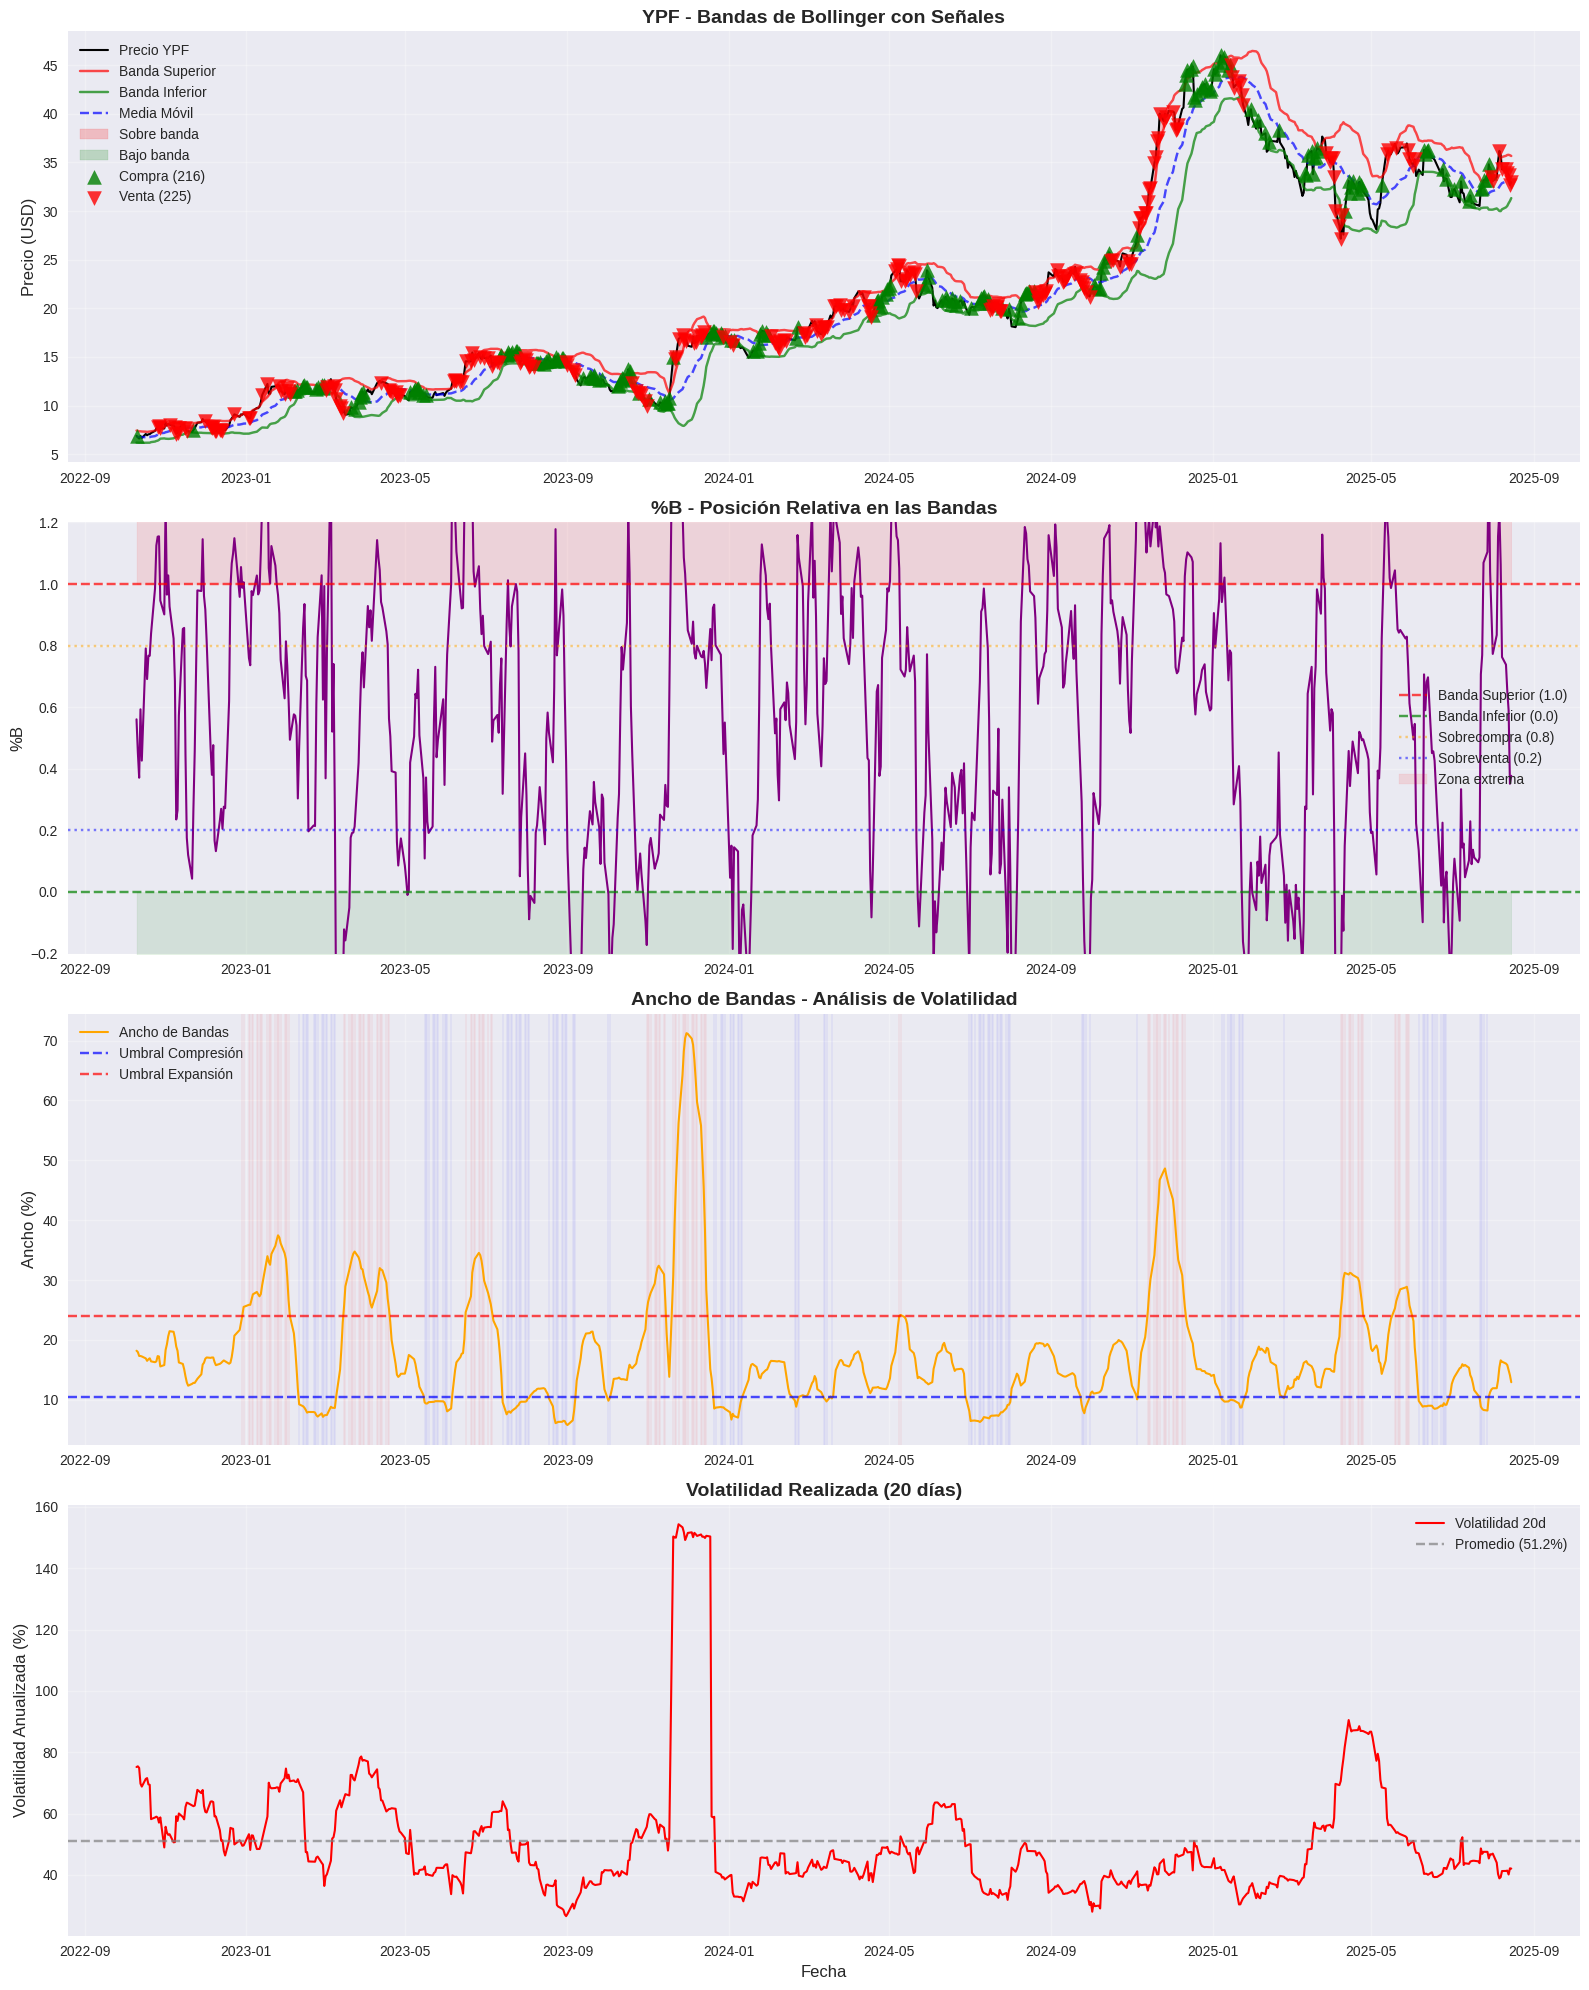

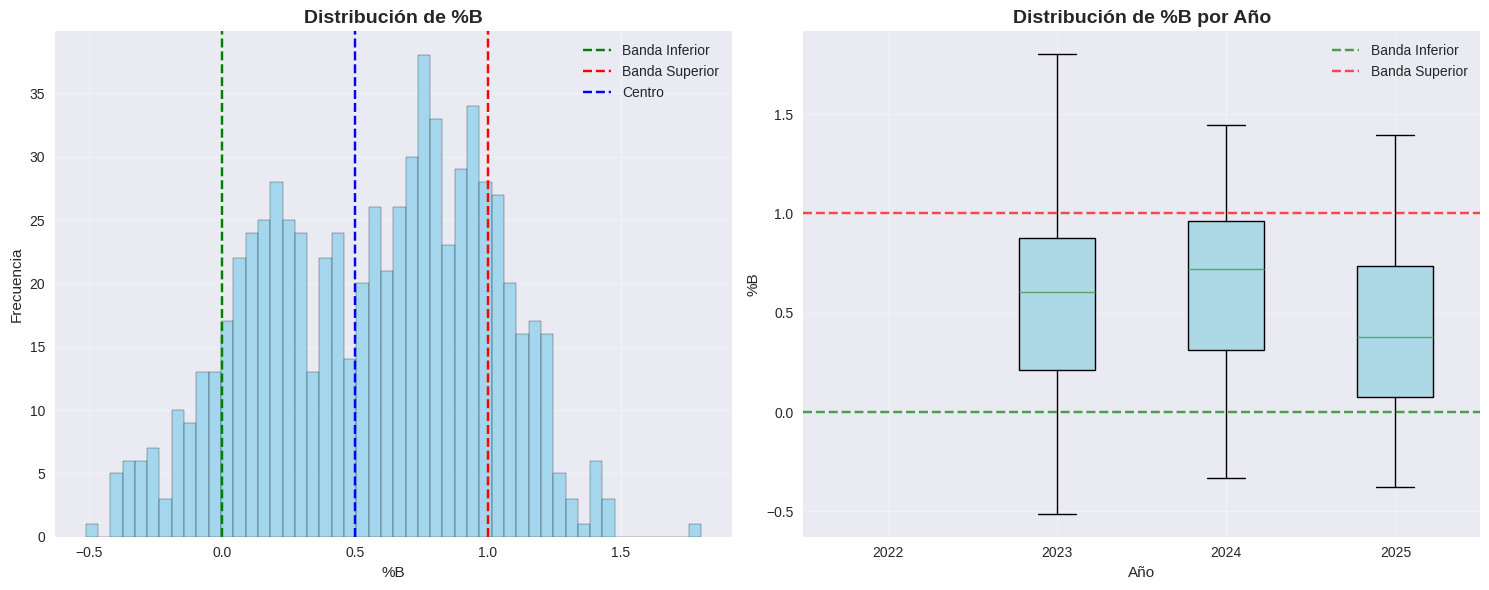

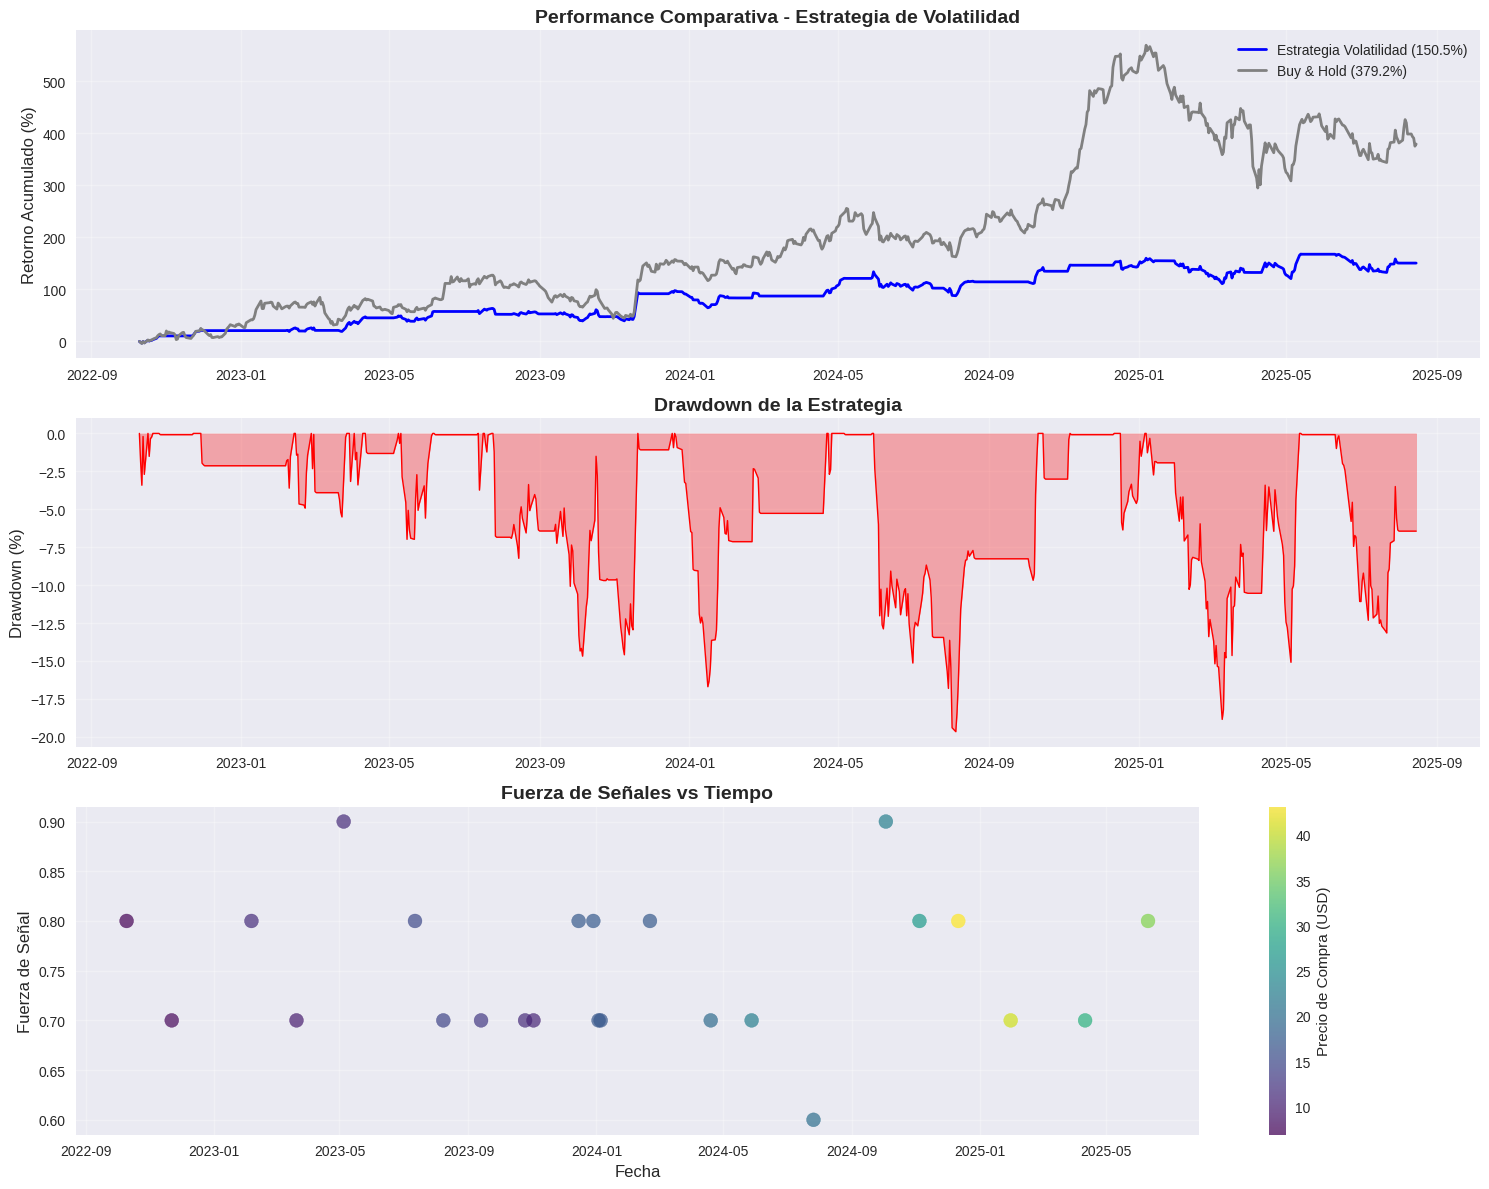


📊 RESUMEN COMPLETO - ANÁLISIS DE VOLATILIDAD YPF

📈 INFORMACIÓN BÁSICA:
   Símbolo:                 YPF
   Período analizado:       3y
   Datos disponibles:       753 observaciones
   Precio actual:           $32.97 USD

🎯 ANÁLISIS DE BANDAS DE BOLLINGER:
   Estado actual:           📊 NORMAL
   Descripción:             Volatilidad en rango normal
   Ancho actual:            12.93%
   Ancho promedio:          18.04%
   Tiempo en compresión:    20.1%
   Tiempo en expansión:     20.1%

⏱️ TIEMPO FUERA DE BANDAS:
   Total fuera de bandas:   26.7%
   Sobre banda superior:    16.6%
   Bajo banda inferior:     10.1%
   Posición actual:         🔵 DENTRO DE BANDAS

💰 PERFORMANCE DE LA ESTRATEGIA:
   Capital inicial:         $100,000
   Capital final:           $250,462
   Retorno estrategia:      +150.46%
   Retorno Buy & Hold:      +379.22%
   Outperformance:          -228.75%
   Número de trades:        48

📊 MÉTRICAS DE RIESGO:
   Volatilidad actual:      42.07%
   Volatilidad promedio:    

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings
from scipy import stats
import seaborn as sns

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10

class VolatilityAnalyzer:
    def __init__(self, symbol='YPF', period='5y'):
        """
        Analizador de volatilidad especializado en Bandas de Bollinger

        Args:
            symbol: Ticker del activo (YPF para ADR en USD)
            period: Período de datos ('1y', '2y', '5y', etc.)
        """
        self.symbol = symbol
        self.period = period
        self.data = None
        self.signals_df = None
        self.backtest_results = None
        self.volatility_stats = {}

    def download_data(self):
        """Descargar datos reales de YPF en USD"""
        print(f"📊 Descargando datos de {self.symbol} ({self.period})...")

        try:
            # YPF cotiza en NYSE como ADR en USD
            ticker = yf.Ticker(self.symbol)
            self.data = ticker.history(period=self.period)

            if self.data.empty:
                raise ValueError(f"No se obtuvieron datos para {self.symbol}")

            # Limpiar datos
            self.data = self.data.dropna()

            # Información básica
            print(f"✅ Datos obtenidos: {len(self.data)} observaciones")
            print(f"📅 Período: {self.data.index[0].strftime('%Y-%m-%d')} a {self.data.index[-1].strftime('%Y-%m-%d')}")
            print(f"💰 Precio actual: ${self.data['Close'].iloc[-1]:.2f} USD")
            print(f"📈 Rango: ${self.data['Close'].min():.2f} - ${self.data['Close'].max():.2f} USD")

            return True

        except Exception as e:
            print(f"❌ Error descargando datos: {e}")
            return False

    def calculate_bollinger_bands(self, period=20, std_dev=2):
        """
        Calcular Bandas de Bollinger con análisis detallado

        Args:
            period: Período para la media móvil
            std_dev: Número de desviaciones estándar
        """
        if self.data is None:
            print("❌ No hay datos disponibles. Ejecute download_data() primero.")
            return False

        print(f"📈 Calculando Bandas de Bollinger (período={period}, std={std_dev})...")

        closes = self.data['Close']

        # Media móvil simple
        sma = closes.rolling(window=period).mean()

        # Desviación estándar móvil
        rolling_std = closes.rolling(window=period).std()

        # Bandas de Bollinger
        upper_band = sma + (rolling_std * std_dev)
        lower_band = sma - (rolling_std * std_dev)

        # Ancho de las bandas (indicador de volatilidad)
        band_width = ((upper_band - lower_band) / sma) * 100

        # %B - Posición del precio dentro de las bandas
        percent_b = (closes - lower_band) / (upper_band - lower_band)

        # Agregar al DataFrame
        self.data['BB_Middle'] = sma
        self.data['BB_Upper'] = upper_band
        self.data['BB_Lower'] = lower_band
        self.data['BB_Width'] = band_width
        self.data['BB_PercentB'] = percent_b

        # Calcular volatilidad realizada
        self.data['Returns'] = closes.pct_change()
        self.data['Volatility_20'] = self.data['Returns'].rolling(window=20).std() * np.sqrt(252) * 100

        print("✅ Bandas de Bollinger calculadas exitosamente")
        return True

    def analyze_band_compression_expansion(self):
        """Analizar períodos de compresión y expansión de volatilidad"""
        if 'BB_Width' not in self.data.columns:
            print("❌ Bandas de Bollinger no calculadas.")
            return None

        print("🔍 Analizando compresión y expansión de bandas...")

        band_width = self.data['BB_Width'].dropna()

        # Percentiles para definir compresión/expansión
        compression_threshold = band_width.quantile(0.2)  # 20% más bajo
        expansion_threshold = band_width.quantile(0.8)    # 20% más alto

        # Identificar períodos
        self.data['Compression'] = self.data['BB_Width'] < compression_threshold
        self.data['Expansion'] = self.data['BB_Width'] > expansion_threshold

        # Estadísticas
        compression_periods = self.data['Compression'].sum()
        expansion_periods = self.data['Expansion'].sum()
        total_periods = len(self.data.dropna())

        compression_pct = (compression_periods / total_periods) * 100
        expansion_pct = (expansion_periods / total_periods) * 100

        # Promedio de ancho de bandas
        avg_width = band_width.mean()
        current_width = band_width.iloc[-1]

        # Estado actual
        if current_width < compression_threshold:
            current_state = "🔒 COMPRESIÓN"
            state_description = "Baja volatilidad - Posible breakout próximo"
        elif current_width > expansion_threshold:
            current_state = "💥 EXPANSIÓN"
            state_description = "Alta volatilidad - Posible reversión próxima"
        else:
            current_state = "📊 NORMAL"
            state_description = "Volatilidad en rango normal"

        stats = {
            'compression_threshold': compression_threshold,
            'expansion_threshold': expansion_threshold,
            'compression_periods': compression_periods,
            'expansion_periods': expansion_periods,
            'compression_pct': compression_pct,
            'expansion_pct': expansion_pct,
            'avg_width': avg_width,
            'current_width': current_width,
            'current_state': current_state,
            'state_description': state_description
        }

        print(f"📊 Análisis de Volatilidad:")
        print(f"   • Períodos de compresión: {compression_periods} ({compression_pct:.1f}%)")
        print(f"   • Períodos de expansión: {expansion_periods} ({expansion_pct:.1f}%)")
        print(f"   • Ancho promedio: {avg_width:.2f}%")
        print(f"   • Ancho actual: {current_width:.2f}%")
        print(f"   • Estado actual: {current_state}")
        print(f"   • Descripción: {state_description}")

        self.volatility_stats.update(stats)
        return stats

    def analyze_time_outside_bands(self):
        """Calcular % de tiempo fuera de las bandas"""
        if 'BB_PercentB' not in self.data.columns:
            print("❌ Bandas de Bollinger no calculadas.")
            return None

        print("📊 Analizando tiempo fuera de bandas...")

        percent_b = self.data['BB_PercentB'].dropna()

        # Tiempo fuera de bandas
        above_upper = (percent_b > 1).sum()  # %B > 1 = precio sobre banda superior
        below_lower = (percent_b < 0).sum()  # %B < 0 = precio bajo banda inferior
        total_outside = above_upper + below_lower

        total_periods = len(percent_b)

        # Porcentajes
        above_upper_pct = (above_upper / total_periods) * 100
        below_lower_pct = (below_lower / total_periods) * 100
        total_outside_pct = (total_outside / total_periods) * 100
        inside_bands_pct = 100 - total_outside_pct

        # Racha más larga fuera de bandas
        def longest_streak(condition):
            streaks = []
            current_streak = 0
            for value in condition:
                if value:
                    current_streak += 1
                else:
                    if current_streak > 0:
                        streaks.append(current_streak)
                    current_streak = 0
            if current_streak > 0:
                streaks.append(current_streak)
            return max(streaks) if streaks else 0

        longest_above = longest_streak(percent_b > 1)
        longest_below = longest_streak(percent_b < 0)

        # Estado actual
        current_percentb = percent_b.iloc[-1]
        if current_percentb > 1:
            current_position = "🔴 SOBRE BANDA SUPERIOR"
            position_description = "Precio en zona de sobrecompra - Posible reversión"
        elif current_percentb < 0:
            current_position = "🟢 BAJO BANDA INFERIOR"
            position_description = "Precio en zona de sobreventa - Posible rebote"
        elif current_percentb > 0.8:
            current_position = "🟡 CERCA BANDA SUPERIOR"
            position_description = "Precio acercándose a sobrecompra"
        elif current_percentb < 0.2:
            current_position = "🟡 CERCA BANDA INFERIOR"
            position_description = "Precio acercándose a sobreventa"
        else:
            current_position = "🔵 DENTRO DE BANDAS"
            position_description = "Precio en rango normal"

        outside_stats = {
            'above_upper': above_upper,
            'below_lower': below_lower,
            'total_outside': total_outside,
            'above_upper_pct': above_upper_pct,
            'below_lower_pct': below_lower_pct,
            'total_outside_pct': total_outside_pct,
            'inside_bands_pct': inside_bands_pct,
            'longest_above': longest_above,
            'longest_below': longest_below,
            'current_percentb': current_percentb,
            'current_position': current_position,
            'position_description': position_description
        }

        print(f"⏱️ Tiempo fuera de bandas:")
        print(f"   • Sobre banda superior: {above_upper} días ({above_upper_pct:.1f}%)")
        print(f"   • Bajo banda inferior: {below_lower} días ({below_lower_pct:.1f}%)")
        print(f"   • Total fuera: {total_outside} días ({total_outside_pct:.1f}%)")
        print(f"   • Dentro de bandas: {inside_bands_pct:.1f}%")
        print(f"   • Racha más larga arriba: {longest_above} días")
        print(f"   • Racha más larga abajo: {longest_below} días")
        print(f"   • Posición actual: {current_position}")
        print(f"   • %B actual: {current_percentb:.3f}")

        self.volatility_stats.update(outside_stats)
        return outside_stats

    def identify_bollinger_signals(self):
        """Identificar señales de compra/venta basadas en Bandas de Bollinger"""
        if 'BB_PercentB' not in self.data.columns:
            print("❌ Bandas de Bollinger no calculadas.")
            return None

        print("⚡ Identificando señales de Bollinger...")

        data = self.data.copy()
        signals = np.zeros(len(data))

        for i in range(2, len(data)):  # Necesitamos al menos 2 períodos previos
            current_pb = data['BB_PercentB'].iloc[i]
            prev_pb = data['BB_PercentB'].iloc[i-1]
            prev2_pb = data['BB_PercentB'].iloc[i-2]

            current_price = data['Close'].iloc[i]
            prev_price = data['Close'].iloc[i-1]

            current_width = data['BB_Width'].iloc[i]
            avg_width = data['BB_Width'].rolling(window=50).mean().iloc[i]

            # Señales de compra
            # 1. Rebote desde banda inferior
            if (prev_pb < 0 and current_pb > 0 and current_price > prev_price):
                signals[i] = 1  # Compra

            # 2. Cruce hacia arriba después de compresión
            elif (current_width < avg_width * 0.8 and  # Compresión
                  prev_pb < 0.2 and current_pb > 0.3 and  # Salida de zona baja
                  current_price > data['BB_Middle'].iloc[i]):  # Precio sobre media
                signals[i] = 1  # Compra

            # Señales de venta
            # 1. Rechazo desde banda superior
            elif (prev_pb > 1 and current_pb < 1 and current_price < prev_price):
                signals[i] = -1  # Venta

            # 2. Sobrecompra extrema con divergencia
            elif (current_pb > 1.1 and prev_pb > 1 and prev2_pb > 1 and
                  current_price < prev_price):  # Precio bajando pero aún sobrecomprado
                signals[i] = -1  # Venta

        data['Signal'] = signals
        self.signals_df = data.dropna()

        buy_signals = len(data[data['Signal'] == 1])
        sell_signals = len(data[data['Signal'] == -1])

        print(f"✅ Señales identificadas:")
        print(f"   • Señales de compra: {buy_signals}")
        print(f"   • Señales de venta: {sell_signals}")

        return data

    def generate_advanced_bollinger_signals(self, bb_oversold=0.05, bb_overbought=0.95,
                                          compression_factor=0.7):
        """
        Generar señales avanzadas combinando múltiples condiciones de Bollinger

        Args:
            bb_oversold: Nivel de %B para sobreventa
            bb_overbought: Nivel de %B para sobrecompra
            compression_factor: Factor para detectar compresión
        """
        if 'BB_PercentB' not in self.data.columns:
            print("❌ Bandas de Bollinger no calculadas.")
            return None

        print("🔬 Generando señales avanzadas de Bollinger...")

        data = self.data.copy()
        signals = np.zeros(len(data))
        signal_strength = np.zeros(len(data))  # Fuerza de la señal (0-1)

        # Calcular medias móviles para el ancho de bandas
        data['BB_Width_MA'] = data['BB_Width'].rolling(window=20).mean()

        for i in range(5, len(data)):  # Necesitamos más historia para señales avanzadas
            current_pb = data['BB_PercentB'].iloc[i]
            prev_pb = data['BB_PercentB'].iloc[i-1]

            current_width = data['BB_Width'].iloc[i]
            avg_width = data['BB_Width_MA'].iloc[i]

            current_price = data['Close'].iloc[i]
            bb_middle = data['BB_Middle'].iloc[i]

            # Variables para evaluar fuerza
            strength = 0

            # SEÑALES DE COMPRA
            buy_conditions = []

            # 1. Rebote desde sobreventa
            if prev_pb <= bb_oversold and current_pb > bb_oversold:
                buy_conditions.append(("Rebote sobreventa", 0.7))

            # 2. Compresión seguida de breakout alcista
            if (current_width < avg_width * compression_factor and
                current_price > bb_middle and
                current_pb > 0.5):
                buy_conditions.append(("Breakout post-compresión", 0.8))

            # 3. Doble toque en banda inferior
            touches_lower = 0
            for j in range(max(0, i-10), i):
                if data['BB_PercentB'].iloc[j] < 0.1:
                    touches_lower += 1

            if touches_lower >= 2 and current_pb > 0.2:
                buy_conditions.append(("Doble toque inferior", 0.6))

            # 4. Reversión desde extremo
            if (data['BB_PercentB'].iloc[i-2] < 0 and
                data['BB_PercentB'].iloc[i-1] < 0.1 and
                current_pb > 0.3):
                buy_conditions.append(("Reversión extremo", 0.9))

            # SEÑALES DE VENTA
            sell_conditions = []

            # 1. Rechazo desde sobrecompra
            if prev_pb >= bb_overbought and current_pb < bb_overbought:
                sell_conditions.append(("Rechazo sobrecompra", 0.7))

            # 2. Expansión extrema con reversión
            if (current_width > avg_width * 1.5 and
                current_pb > 0.9 and
                current_price < data['Close'].iloc[i-1]):
                sell_conditions.append(("Reversión post-expansión", 0.8))

            # 3. Doble toque en banda superior
            touches_upper = 0
            for j in range(max(0, i-10), i):
                if data['BB_PercentB'].iloc[j] > 0.9:
                    touches_upper += 1

            if touches_upper >= 2 and current_pb < 0.8:
                sell_conditions.append(("Doble toque superior", 0.6))

            # 4. Sobrecompra extrema
            if current_pb > 1.1 and prev_pb > 1.05:
                sell_conditions.append(("Sobrecompra extrema", 0.9))

            # Evaluar señales
            if buy_conditions:
                signals[i] = 1
                strength = max([cond[1] for cond in buy_conditions])
                signal_strength[i] = strength
            elif sell_conditions:
                signals[i] = -1
                strength = max([cond[1] for cond in sell_conditions])
                signal_strength[i] = strength

        data['Signal'] = signals
        data['Signal_Strength'] = signal_strength
        self.signals_df = data.dropna()

        # Filtrar señales por fuerza mínima
        strong_signals = data[data['Signal_Strength'] >= 0.6]
        buy_signals = len(strong_signals[strong_signals['Signal'] == 1])
        sell_signals = len(strong_signals[strong_signals['Signal'] == -1])

        print(f"✅ Señales avanzadas generadas:")
        print(f"   • Señales de compra (fuertes): {buy_signals}")
        print(f"   • Señales de venta (fuertes): {sell_signals}")
        print(f"   • Fuerza promedio: {data['Signal_Strength'][data['Signal_Strength'] > 0].mean():.2f}")

        return data

    def optimize_bollinger_parameters(self):
        """Optimizar parámetros de las Bandas de Bollinger"""
        print("🔧 Optimizando parámetros de Bollinger...")

        param_combinations = [
            (15, 1.5), (15, 2.0), (15, 2.5),
            (20, 1.5), (20, 2.0), (20, 2.5),
            (25, 1.5), (25, 2.0), (25, 2.5),
            (30, 1.5), (30, 2.0), (30, 2.5)
        ]

        best_score = -np.inf
        best_params = None
        results = []

        original_data = self.data.copy()

        for period, std_dev in param_combinations:
            try:
                # Recalcular Bollinger con nuevos parámetros
                self.calculate_bollinger_bands(period, std_dev)

                # Generar señales simples para optimización
                data = self.data.dropna()
                signals = np.zeros(len(data))

                for i in range(1, len(data)):
                    current_pb = data['BB_PercentB'].iloc[i]
                    prev_pb = data['BB_PercentB'].iloc[i-1]

                    # Señales simples
                    if prev_pb < 0.1 and current_pb > 0.2:  # Rebote
                        signals[i] = 1
                    elif prev_pb > 0.9 and current_pb < 0.8:  # Rechazo
                        signals[i] = -1

                # Backtest rápido
                score = self._quick_backtest(data, signals)

                results.append({
                    'period': period,
                    'std_dev': std_dev,
                    'score': score
                })

                if score > best_score:
                    best_score = score
                    best_params = (period, std_dev)

            except Exception as e:
                continue

        # Restaurar datos originales
        self.data = original_data

        print(f"✅ Optimización completada")
        if best_params:
            print(f"🏆 Mejores parámetros:")
            print(f"   • Período: {best_params[0]}")
            print(f"   • Desviaciones estándar: {best_params[1]}")
            print(f"   • Score: {best_score:.2f}")

        return best_params, results

    def _quick_backtest(self, data, signals):
        """Backtest rápido para optimización"""
        if len(signals) == 0 or signals.sum() == 0:
            return -999

        capital = 10000
        shares = 0
        position = 0

        for i in range(len(data)):
            if i >= len(signals):
                break

            price = data['Close'].iloc[i]
            signal = signals[i]

            if signal == 1 and position == 0:
                shares = capital / price
                capital = 0
                position = 1
            elif signal == -1 and position == 1:
                capital = shares * price
                shares = 0
                position = 0

        # Valor final
        if position == 1:
            final_value = shares * data['Close'].iloc[-1]
        else:
            final_value = capital

        # Retorno vs Buy & Hold
        strategy_return = (final_value / 10000 - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

        return strategy_return - bh_return

    def backtest_volatility_strategy(self, initial_capital=100000):
        """Ejecutar backtest de la estrategia de volatilidad"""
        if self.signals_df is None:
            print("❌ No hay señales generadas. Ejecute generate_advanced_bollinger_signals() primero.")
            return None

        print(f"💰 Ejecutando backtest de volatilidad con capital inicial: ${initial_capital:,}")

        data = self.signals_df.copy()

        capital = initial_capital
        shares = 0
        position = 0
        trades = []
        portfolio_values = []

        for i, (date, row) in enumerate(data.iterrows()):
            price = row['Close']
            signal = row['Signal']
            signal_strength = row.get('Signal_Strength', 0.5)

            # Valor del portafolio
            if position == 1:
                portfolio_value = capital + (shares * price)
            else:
                portfolio_value = capital

            portfolio_values.append(portfolio_value)

            # Position sizing basado en fuerza de señal
            position_size = min(0.9, 0.5 + (signal_strength * 0.4))  # 50%-90% del capital

            # Ejecutar trades
            if signal == 1 and position == 0:  # Compra
                investment = capital * position_size
                if investment > 0:
                    shares = investment / (price * 1.001)  # Incluir costos
                    capital -= investment
                    position = 1

                    trades.append({
                        'date': date,
                        'action': 'BUY',
                        'price': price,
                        'shares': shares,
                        'capital': capital,
                        'signal_strength': signal_strength,
                        'position_size': position_size
                    })

            elif signal == -1 and position == 1:  # Venta
                if shares > 0:
                    proceeds = shares * price * 0.999  # Incluir costos
                    capital += proceeds

                    trades.append({
                        'date': date,
                        'action': 'SELL',
                        'price': price,
                        'shares': shares,
                        'capital': capital,
                        'signal_strength': signal_strength
                    })

                    shares = 0
                    position = 0

        # Cerrar posición final
        if position == 1:
            final_price = data['Close'].iloc[-1]
            proceeds = shares * final_price * 0.999
            capital += proceeds

            trades.append({
                'date': data.index[-1],
                'action': 'SELL_FINAL',
                'price': final_price,
                'shares': shares,
                'capital': capital,
                'signal_strength': 0
            })

        self.backtest_results = {
            'initial_capital': initial_capital,
            'final_capital': capital,
            'portfolio_values': portfolio_values,
            'trades': trades,
            'data': data
        }

        # Calcular métricas
        total_return = (capital / initial_capital - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

        print(f"✅ Backtest completado:")
        print(f"   • Retorno estrategia: {total_return:.2f}%")
        print(f"   • Retorno Buy & Hold: {bh_return:.2f}%")
        print(f"   • Outperformance: {total_return - bh_return:.2f}%")
        print(f"   • Número de trades: {len([t for t in trades if t['action'] in ['BUY', 'SELL']])}")

        return self.backtest_results

    def plot_volatility_analysis(self):
        """Crear visualizaciones del análisis de volatilidad"""
        if self.data is None:
            print("❌ No hay datos para graficar.")
            return

        fig, axes = plt.subplots(4, 1, figsize=(16, 20))

        data = self.signals_df if self.signals_df is not None else self.data.dropna()

        # 1. Precio con Bandas de Bollinger y señales
        ax1 = axes[0]
        ax1.plot(data.index, data['Close'], 'k-', linewidth=1.5, label='Precio YPF')
        ax1.plot(data.index, data['BB_Upper'], 'r-', alpha=0.7, label='Banda Superior')
        ax1.plot(data.index, data['BB_Lower'], 'g-', alpha=0.7, label='Banda Inferior')
        ax1.plot(data.index, data['BB_Middle'], 'b--', alpha=0.7, label='Media Móvil')

        # Sombrear áreas fuera de bandas
        ax1.fill_between(data.index, data['BB_Upper'], data['Close'],
                        where=(data['Close'] > data['BB_Upper']),
                        color='red', alpha=0.2, label='Sobre banda')
        ax1.fill_between(data.index, data['BB_Lower'], data['Close'],
                        where=(data['Close'] < data['BB_Lower']),
                        color='green', alpha=0.2, label='Bajo banda')

        # Señales si existen
        if 'Signal' in data.columns:
            buy_signals = data[data['Signal'] == 1]
            sell_signals = data[data['Signal'] == -1]

            if len(buy_signals) > 0:
                ax1.scatter(buy_signals.index, buy_signals['Close'],
                           color='green', s=100, marker='^', alpha=0.8,
                           label=f'Compra ({len(buy_signals)})', zorder=5)

            if len(sell_signals) > 0:
                ax1.scatter(sell_signals.index, sell_signals['Close'],
                           color='red', s=100, marker='v', alpha=0.8,
                           label=f'Venta ({len(sell_signals)})', zorder=5)

        ax1.set_title(f'{self.symbol} - Bandas de Bollinger con Señales', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Precio (USD)', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. %B (Posición dentro de las bandas)
        ax2 = axes[1]
        ax2.plot(data.index, data['BB_PercentB'], 'purple', linewidth=1.5)
        ax2.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Banda Superior (1.0)')
        ax2.axhline(y=0, color='g', linestyle='--', alpha=0.7, label='Banda Inferior (0.0)')
        ax2.axhline(y=0.8, color='orange', linestyle=':', alpha=0.5, label='Sobrecompra (0.8)')
        ax2.axhline(y=0.2, color='blue', linestyle=':', alpha=0.5, label='Sobreventa (0.2)')

        # Sombrear zonas extremas
        ax2.fill_between(data.index, 1, 1.5, alpha=0.1, color='red', label='Zona extrema')
        ax2.fill_between(data.index, -0.5, 0, alpha=0.1, color='green')

        ax2.set_title('%B - Posición Relativa en las Bandas', fontsize=14, fontweight='bold')
        ax2.set_ylabel('%B', fontsize=12)
        ax2.set_ylim(-0.2, 1.2)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Ancho de Bandas (Volatilidad)
        ax3 = axes[2]
        ax3.plot(data.index, data['BB_Width'], 'orange', linewidth=1.5, label='Ancho de Bandas')

        if 'compression_threshold' in self.volatility_stats:
            ax3.axhline(y=self.volatility_stats['compression_threshold'],
                       color='blue', linestyle='--', alpha=0.7, label='Umbral Compresión')
        if 'expansion_threshold' in self.volatility_stats:
            ax3.axhline(y=self.volatility_stats['expansion_threshold'],
                       color='red', linestyle='--', alpha=0.7, label='Umbral Expansión')

        # Sombrear períodos de compresión/expansión
        if 'Compression' in data.columns:
            compression_periods = data[data['Compression']]
            if len(compression_periods) > 0:
                for period in compression_periods.index:
                    ax3.axvspan(period, period, alpha=0.2, color='blue')

        if 'Expansion' in data.columns:
            expansion_periods = data[data['Expansion']]
            if len(expansion_periods) > 0:
                for period in expansion_periods.index:
                    ax3.axvspan(period, period, alpha=0.2, color='red')

        ax3.set_title('Ancho de Bandas - Análisis de Volatilidad', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Ancho (%)', fontsize=12)
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. Volatilidad Realizada
        ax4 = axes[3]
        if 'Volatility_20' in data.columns:
            ax4.plot(data.index, data['Volatility_20'], 'red', linewidth=1.5, label='Volatilidad 20d')
            avg_vol = data['Volatility_20'].mean()
            ax4.axhline(y=avg_vol, color='gray', linestyle='--', alpha=0.7,
                       label=f'Promedio ({avg_vol:.1f}%)')

        ax4.set_title('Volatilidad Realizada (20 días)', fontsize=14, fontweight='bold')
        ax4.set_ylabel('Volatilidad Anualizada (%)', fontsize=12)
        ax4.set_xlabel('Fecha', fontsize=12)
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Gráfico adicional de distribución de %B
        self.plot_percentb_distribution()

        # Gráfico de performance si hay backtest
        if self.backtest_results:
            self.plot_volatility_performance()

    def plot_percentb_distribution(self):
        """Graficar distribución del %B"""
        if 'BB_PercentB' not in self.data.columns:
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        percent_b = self.data['BB_PercentB'].dropna()

        # Histograma
        ax1.hist(percent_b, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.axvline(x=0, color='green', linestyle='--', label='Banda Inferior')
        ax1.axvline(x=1, color='red', linestyle='--', label='Banda Superior')
        ax1.axvline(x=0.5, color='blue', linestyle='--', label='Centro')
        ax1.set_title('Distribución de %B', fontsize=14, fontweight='bold')
        ax1.set_xlabel('%B')
        ax1.set_ylabel('Frecuencia')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Box plot por año
        percent_b_by_year = self.data['BB_PercentB'].groupby(self.data.index.year)
        years = list(percent_b_by_year.groups.keys())
        values = [percent_b_by_year.get_group(year).values for year in years]

        box_plot = ax2.boxplot(values, labels=years, patch_artist=True)
        for patch in box_plot['boxes']:
            patch.set_facecolor('lightblue')

        ax2.axhline(y=0, color='green', linestyle='--', alpha=0.7, label='Banda Inferior')
        ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Banda Superior')
        ax2.set_title('Distribución de %B por Año', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Año')
        ax2.set_ylabel('%B')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_volatility_performance(self):
        """Graficar performance de la estrategia de volatilidad"""
        if not self.backtest_results:
            return

        fig, axes = plt.subplots(3, 1, figsize=(15, 12))

        data = self.backtest_results['data']
        portfolio_values = self.backtest_results['portfolio_values']

        # 1. Performance comparativa
        strategy_returns = [(pv / self.backtest_results['initial_capital'] - 1) * 100
                          for pv in portfolio_values]
        bh_returns = [(data['Close'].iloc[i] / data['Close'].iloc[0] - 1) * 100
                     for i in range(len(data))]

        ax1 = axes[0]
        ax1.plot(data.index, strategy_returns, 'b-', linewidth=2,
                label=f"Estrategia Volatilidad ({strategy_returns[-1]:.1f}%)")
        ax1.plot(data.index, bh_returns, 'gray', linewidth=2,
                label=f"Buy & Hold ({bh_returns[-1]:.1f}%)")

        ax1.set_title('Performance Comparativa - Estrategia de Volatilidad',
                     fontsize=14, fontweight='bold')
        ax1.set_ylabel('Retorno Acumulado (%)', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Drawdown
        portfolio_series = pd.Series(portfolio_values, index=data.index)
        rolling_max = portfolio_series.expanding().max()
        drawdown = (portfolio_series - rolling_max) / rolling_max * 100

        ax2 = axes[1]
        ax2.fill_between(data.index, drawdown, 0, color='red', alpha=0.3)
        ax2.plot(data.index, drawdown, 'r-', linewidth=1)
        ax2.set_title('Drawdown de la Estrategia', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Drawdown (%)', fontsize=12)
        ax2.grid(True, alpha=0.3)

        # 3. Trades por fuerza de señal
        trades_df = pd.DataFrame(self.backtest_results['trades'])
        if not trades_df.empty and 'signal_strength' in trades_df.columns:
            buy_trades = trades_df[trades_df['action'] == 'BUY']

            ax3 = axes[2]
            if not buy_trades.empty:
                ax3.scatter(buy_trades['date'], buy_trades['signal_strength'],
                           c=buy_trades['price'], s=100, alpha=0.7, cmap='viridis')
                ax3.set_title('Fuerza de Señales vs Tiempo', fontsize=14, fontweight='bold')
                ax3.set_ylabel('Fuerza de Señal', fontsize=12)
                ax3.set_xlabel('Fecha', fontsize=12)
                ax3.grid(True, alpha=0.3)

                # Colorbar
                cbar = plt.colorbar(ax3.collections[0], ax=ax3)
                cbar.set_label('Precio de Compra (USD)')

        plt.tight_layout()
        plt.show()

    def calculate_volatility_metrics(self):
        """Calcular métricas avanzadas de volatilidad"""
        if self.data is None:
            return None

        print("📊 Calculando métricas avanzadas de volatilidad...")

        data = self.data.dropna()
        returns = data['Returns'].dropna()

        # Métricas básicas
        current_vol = returns.rolling(20).std().iloc[-1] * np.sqrt(252) * 100
        avg_vol = returns.std() * np.sqrt(252) * 100
        vol_percentile = stats.percentileofscore(
            returns.rolling(20).std() * np.sqrt(252) * 100, current_vol
        )

        # Volatilidad de la volatilidad
        vol_series = returns.rolling(20).std() * np.sqrt(252) * 100
        vol_of_vol = vol_series.std()

        # Skewness y Kurtosis
        skewness = returns.skew()
        kurtosis = returns.kurtosis()

        # VaR y ES
        var_95 = returns.quantile(0.05) * 100
        var_99 = returns.quantile(0.01) * 100
        es_95 = returns[returns <= returns.quantile(0.05)].mean() * 100

        # Ratio de Calmar
        if self.backtest_results:
            portfolio_values = pd.Series(self.backtest_results['portfolio_values'])
            rolling_max = portfolio_values.expanding().max()
            drawdown = (portfolio_values - rolling_max) / rolling_max
            max_dd = abs(drawdown.min())

            total_return = (self.backtest_results['final_capital'] /
                          self.backtest_results['initial_capital'] - 1)
            calmar_ratio = (total_return * 100) / (max_dd * 100) if max_dd > 0 else 0
        else:
            calmar_ratio = 0

        metrics = {
            'current_volatility': current_vol,
            'average_volatility': avg_vol,
            'volatility_percentile': vol_percentile,
            'volatility_of_volatility': vol_of_vol,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'var_95': var_95,
            'var_99': var_99,
            'expected_shortfall_95': es_95,
            'calmar_ratio': calmar_ratio
        }

        print(f"📈 Métricas de Volatilidad:")
        print(f"   • Volatilidad actual (20d):  {current_vol:.2f}%")
        print(f"   • Volatilidad promedio:      {avg_vol:.2f}%")
        print(f"   • Percentil de volatilidad:  {vol_percentile:.1f}%")
        print(f"   • Vol de la volatilidad:     {vol_of_vol:.2f}%")
        print(f"   • Skewness:                  {skewness:.3f}")
        print(f"   • Kurtosis:                  {kurtosis:.3f}")
        print(f"   • VaR 95%:                   {var_95:.2f}%")
        print(f"   • VaR 99%:                   {var_99:.2f}%")
        print(f"   • Expected Shortfall 95%:   {es_95:.2f}%")
        if calmar_ratio > 0:
            print(f"   • Calmar Ratio:              {calmar_ratio:.3f}")

        self.volatility_stats.update(metrics)
        return metrics

    def print_volatility_summary(self):
        """Imprimir resumen completo del análisis de volatilidad"""
        print("\n" + "="*60)
        print("📊 RESUMEN COMPLETO - ANÁLISIS DE VOLATILIDAD YPF")
        print("="*60)

        # Información básica
        if self.data is not None:
            print(f"\n📈 INFORMACIÓN BÁSICA:")
            print(f"   Símbolo:                 {self.symbol}")
            print(f"   Período analizado:       {self.period}")
            print(f"   Datos disponibles:       {len(self.data)} observaciones")
            print(f"   Precio actual:           ${self.data['Close'].iloc[-1]:.2f} USD")

        # Estadísticas de bandas
        if self.volatility_stats:
            print(f"\n🎯 ANÁLISIS DE BANDAS DE BOLLINGER:")

            if 'current_state' in self.volatility_stats:
                print(f"   Estado actual:           {self.volatility_stats['current_state']}")
                print(f"   Descripción:             {self.volatility_stats['state_description']}")

            if 'current_width' in self.volatility_stats:
                print(f"   Ancho actual:            {self.volatility_stats['current_width']:.2f}%")
                print(f"   Ancho promedio:          {self.volatility_stats['avg_width']:.2f}%")

            if 'compression_pct' in self.volatility_stats:
                print(f"   Tiempo en compresión:    {self.volatility_stats['compression_pct']:.1f}%")
                print(f"   Tiempo en expansión:     {self.volatility_stats['expansion_pct']:.1f}%")

            if 'total_outside_pct' in self.volatility_stats:
                print(f"\n⏱️ TIEMPO FUERA DE BANDAS:")
                print(f"   Total fuera de bandas:   {self.volatility_stats['total_outside_pct']:.1f}%")
                print(f"   Sobre banda superior:    {self.volatility_stats['above_upper_pct']:.1f}%")
                print(f"   Bajo banda inferior:     {self.volatility_stats['below_lower_pct']:.1f}%")
                print(f"   Posición actual:         {self.volatility_stats['current_position']}")

        # Resultados del backtest
        if self.backtest_results:
            results = self.backtest_results
            data = results['data']

            total_return = (results['final_capital'] / results['initial_capital'] - 1) * 100
            bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100
            outperformance = total_return - bh_return

            trades = [t for t in results['trades'] if t['action'] in ['BUY', 'SELL']]

            print(f"\n💰 PERFORMANCE DE LA ESTRATEGIA:")
            print(f"   Capital inicial:         ${results['initial_capital']:,}")
            print(f"   Capital final:           ${results['final_capital']:,.0f}")
            print(f"   Retorno estrategia:      {total_return:+.2f}%")
            print(f"   Retorno Buy & Hold:      {bh_return:+.2f}%")
            print(f"   Outperformance:          {outperformance:+.2f}%")
            print(f"   Número de trades:        {len(trades)}")

        # Métricas de riesgo
        if 'current_volatility' in self.volatility_stats:
            print(f"\n📊 MÉTRICAS DE RIESGO:")
            print(f"   Volatilidad actual:      {self.volatility_stats['current_volatility']:.2f}%")
            print(f"   Volatilidad promedio:    {self.volatility_stats['average_volatility']:.2f}%")
            print(f"   VaR 95%:                 {self.volatility_stats['var_95']:.2f}%")
            print(f"   Expected Shortfall 95%:  {self.volatility_stats['expected_shortfall_95']:.2f}%")

        # Evaluación final
        score = 0

        # Scoring basado en métricas disponibles
        if self.backtest_results:
            if outperformance > 5: score += 25
            elif outperformance > 0: score += 15

            if len(trades) > 10: score += 15
            elif len(trades) > 5: score += 10

        if 'total_outside_pct' in self.volatility_stats:
            if 15 <= self.volatility_stats['total_outside_pct'] <= 25: score += 20
            elif 10 <= self.volatility_stats['total_outside_pct'] <= 30: score += 15

        if 'current_volatility' in self.volatility_stats:
            vol_ratio = self.volatility_stats['current_volatility'] / self.volatility_stats['average_volatility']
            if 0.8 <= vol_ratio <= 1.2: score += 20
            elif 0.6 <= vol_ratio <= 1.4: score += 15

        print(f"\n🏆 EVALUACIÓN FINAL:")
        print(f"   Puntuación:              {score}/100")

        if score >= 70:
            rating = "🟢 EXCELENTE"
            recommendation = "Estrategia de volatilidad muy sólida. Implementar con confianza."
        elif score >= 50:
            rating = "🟡 BUENA"
            recommendation = "Estrategia prometedora. Monitorear y ajustar según condiciones."
        elif score >= 30:
            rating = "🟠 ACEPTABLE"
            recommendation = "Estrategia necesita mejoras. Considerar ajustes en parámetros."
        else:
            rating = "🔴 DEFICIENTE"
            recommendation = "Estrategia no recomendada. Revisar lógica fundamental."

        print(f"   Calificación:            {rating}")
        print(f"\n💡 RECOMENDACIÓN:")
        print(f"   {recommendation}")

        print("="*60)

# Función principal para ejecutar el análisis completo de volatilidad
def run_volatility_analysis():
    """Ejecutar análisis completo de volatilidad para YPF"""

    # Crear analizador
    analyzer = VolatilityAnalyzer('YPF', '3y')

    # 1. Descargar datos
    if not analyzer.download_data():
        return None

    # 2. Optimizar parámetros de Bollinger
    best_params, optimization_results = analyzer.optimize_bollinger_parameters()

    # 3. Calcular Bandas de Bollinger con parámetros óptimos
    if best_params:
        analyzer.calculate_bollinger_bands(best_params[0], best_params[1])
    else:
        analyzer.calculate_bollinger_bands()  # Usar parámetros por defecto

    # 4. Analizar compresión/expansión
    analyzer.analyze_band_compression_expansion()

    # 5. Analizar tiempo fuera de bandas
    analyzer.analyze_time_outside_bands()

    # 6. Generar señales avanzadas
    analyzer.generate_advanced_bollinger_signals()

    # 7. Ejecutar backtest
    analyzer.backtest_volatility_strategy()

    # 8. Calcular métricas avanzadas
    analyzer.calculate_volatility_metrics()

    # 9. Crear visualizaciones
    analyzer.plot_volatility_analysis()

    # 10. Mostrar resumen
    analyzer.print_volatility_summary()

    return analyzer

# Ejecutar análisis
if __name__ == "__main__":
    print("🚀 Iniciando análisis completo de volatilidad para YPF...")
    analyzer = run_volatility_analysis()

# 8) Estrategia Integral y Backtesting

🚀 ESTRATEGIA INTEGRAL SIMPLIFICADA YPF
📊 Descargando datos de YPF (3y)...
✅ Datos obtenidos: 753 observaciones
📅 Período: 2022-08-16 a 2025-08-15
💰 Precio actual: $32.97 USD
📈 Calculando indicadores técnicos...
✅ Indicadores calculados exitosamente
⚡ Generando señales integradas...
✅ Señales generadas:
   • Señales de compra: 32
   • Señales de venta: 10
💰 Ejecutando backtest con capital inicial: $100,000

📊 REPORTE DE PERFORMANCE - ESTRATEGIA INTEGRAL YPF

💰 RENDIMIENTO:
   Capital inicial:     $100,000
   Capital final:       $375,224
   Retorno estrategia:  +275.22%
   Retorno Buy & Hold:  +376.45%
   Outperformance:      -101.22%

📈 MÉTRICAS CLAVE:
   Sharpe Ratio:        1.172
   Calmar Ratio:        1.596
   Win Rate:            60.0%
   Maximum Drawdown:    36.49%
   Total trades:        11

🏆 EVALUACIÓN:
   Puntuación:          40/100
   Calificación:        🟠 ACEPTABLE


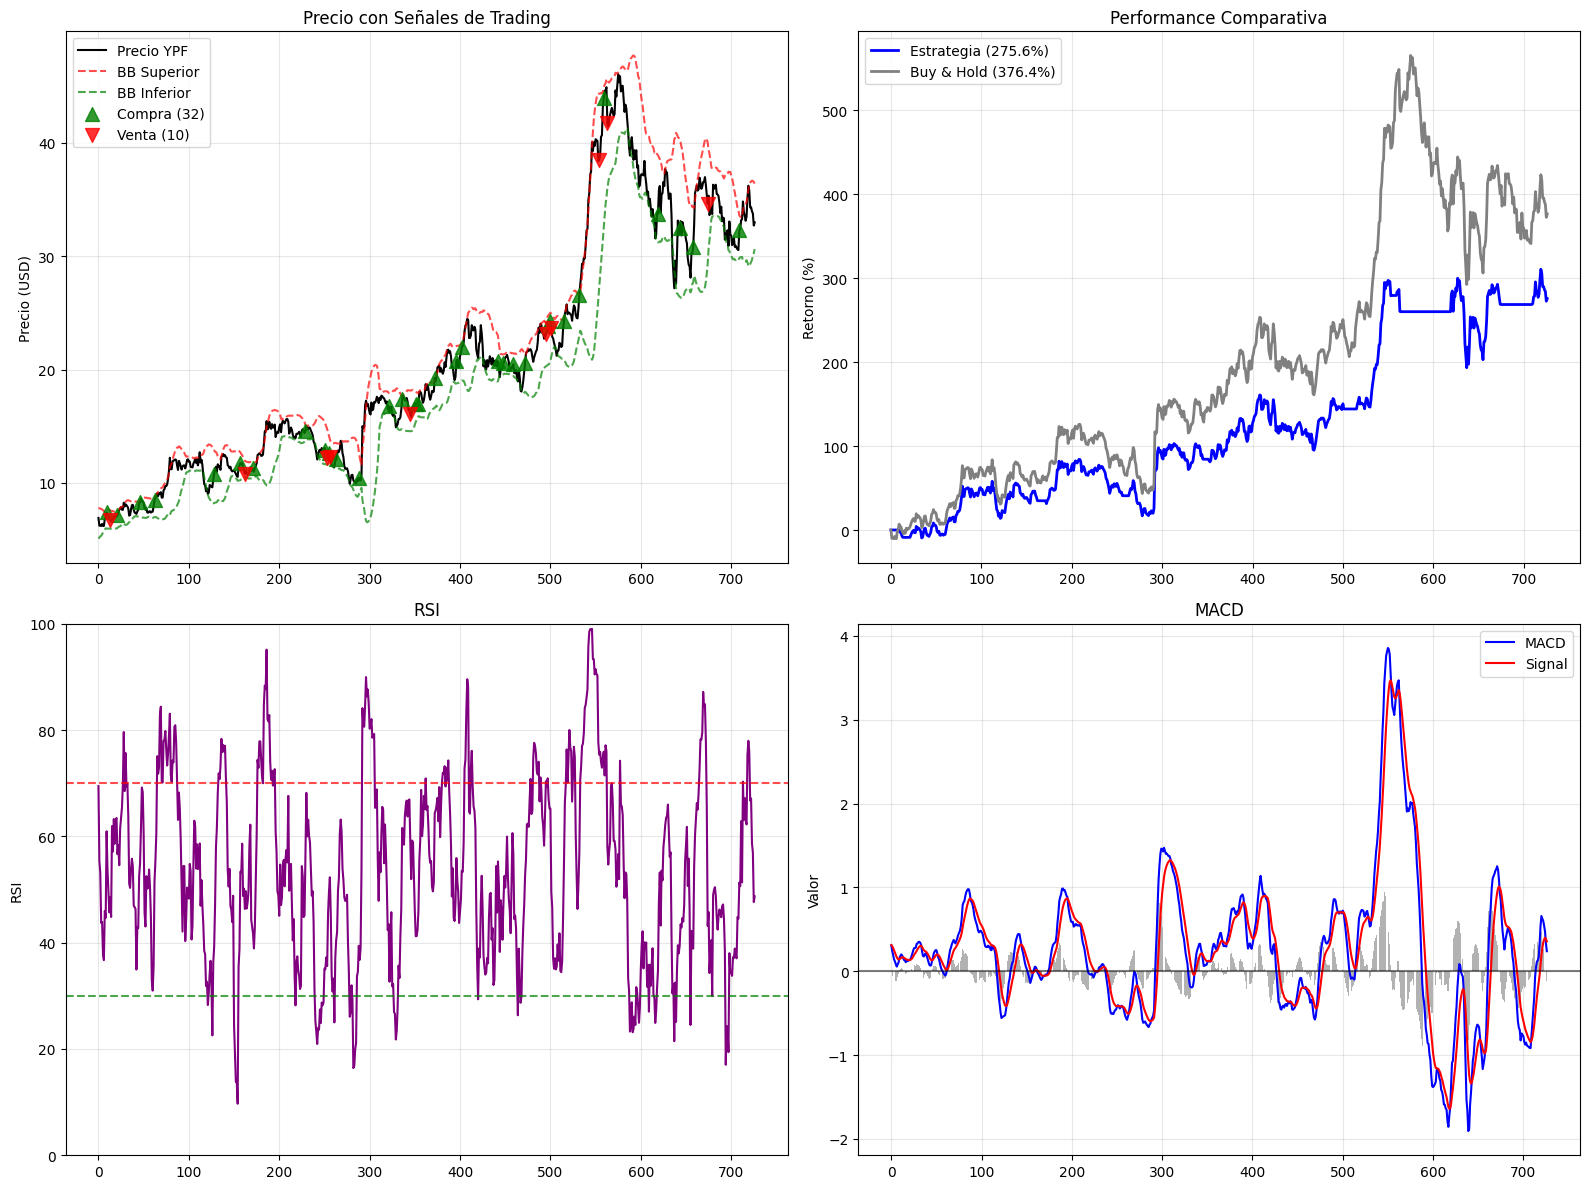

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

class SimpleIntegratedStrategy:
    def __init__(self, symbol='YPF', period='3y'):
        """
        Estrategia integral simplificada que combina momentum y volatilidad
        """
        self.symbol = symbol
        self.period = period
        self.data = None
        self.signals_df = None
        self.backtest_results = None

    def download_data(self):
        """Descargar datos reales de YPF en USD"""
        print(f"📊 Descargando datos de {self.symbol} ({self.period})...")

        try:
            ticker = yf.Ticker(self.symbol)
            self.data = ticker.history(period=self.period)

            if self.data.empty:
                raise ValueError(f"No se obtuvieron datos para {self.symbol}")

            self.data = self.data.dropna()

            print(f"✅ Datos obtenidos: {len(self.data)} observaciones")
            print(f"📅 Período: {self.data.index[0].strftime('%Y-%m-%d')} a {self.data.index[-1].strftime('%Y-%m-%d')}")
            print(f"💰 Precio actual: ${self.data['Close'].iloc[-1]:.2f} USD")

            return True

        except Exception as e:
            print(f"❌ Error descargando datos: {e}")
            return False

    def calculate_indicators(self):
        """Calcular todos los indicadores técnicos de forma simple"""
        if self.data is None:
            print("❌ No hay datos disponibles.")
            return False

        print("📈 Calculando indicadores técnicos...")

        # Usar pandas para cálculos más simples
        close = self.data['Close']
        high = self.data['High']
        low = self.data['Low']

        # === MACD ===
        exp1 = close.ewm(span=12).mean()
        exp2 = close.ewm(span=26).mean()
        self.data['MACD'] = exp1 - exp2
        self.data['MACD_Signal'] = self.data['MACD'].ewm(span=9).mean()
        self.data['MACD_Histogram'] = self.data['MACD'] - self.data['MACD_Signal']

        # === RSI ===
        delta = close.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        self.data['RSI'] = 100 - (100 / (1 + rs))

        # === Bandas de Bollinger ===
        self.data['BB_Middle'] = close.rolling(window=20).mean()
        bb_std = close.rolling(window=20).std()
        self.data['BB_Upper'] = self.data['BB_Middle'] + (bb_std * 2)
        self.data['BB_Lower'] = self.data['BB_Middle'] - (bb_std * 2)
        self.data['BB_Width'] = ((self.data['BB_Upper'] - self.data['BB_Lower']) / self.data['BB_Middle']) * 100
        self.data['BB_PercentB'] = (close - self.data['BB_Lower']) / (self.data['BB_Upper'] - self.data['BB_Lower'])

        # === ADX Simplificado ===
        # True Range
        tr1 = high - low
        tr2 = abs(high - close.shift())
        tr3 = abs(low - close.shift())
        tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
        atr = tr.rolling(window=14).mean()

        # Directional Movement
        up_move = high - high.shift()
        down_move = low.shift() - low

        dm_plus = pd.Series(np.where((up_move > down_move) & (up_move > 0), up_move, 0), index=self.data.index)
        dm_minus = pd.Series(np.where((down_move > up_move) & (down_move > 0), down_move, 0), index=self.data.index)

        dm_plus_smooth = dm_plus.rolling(window=14).mean()
        dm_minus_smooth = dm_minus.rolling(window=14).mean()

        self.data['DI_Plus'] = 100 * dm_plus_smooth / atr
        self.data['DI_Minus'] = 100 * dm_minus_smooth / atr

        dx = 100 * abs(self.data['DI_Plus'] - self.data['DI_Minus']) / (self.data['DI_Plus'] + self.data['DI_Minus'])
        self.data['ADX'] = dx.rolling(window=14).mean()

        # === Indicadores adicionales ===
        self.data['Returns'] = close.pct_change()
        self.data['Volatility'] = self.data['Returns'].rolling(window=20).std() * np.sqrt(252) * 100

        print("✅ Indicadores calculados exitosamente")
        return True

    def generate_signals(self):
        """Generar señales de trading simplificadas"""
        if self.data is None:
            print("❌ No hay datos con indicadores calculados.")
            return None

        print("⚡ Generando señales integradas...")

        # Limpiar datos y resetear índice para evitar problemas de indexing
        data = self.data.dropna().reset_index(drop=True)
        signals = np.zeros(len(data))

        # Usar iloc para acceso posicional seguro
        for i in range(2, len(data)):
            try:
                # Variables actuales
                macd_curr = data['MACD'].iloc[i]
                macd_signal_curr = data['MACD_Signal'].iloc[i]
                macd_prev = data['MACD'].iloc[i-1]
                macd_signal_prev = data['MACD_Signal'].iloc[i-1]

                rsi_curr = data['RSI'].iloc[i]

                bb_percentb_curr = data['BB_PercentB'].iloc[i]
                bb_percentb_prev = data['BB_PercentB'].iloc[i-1]

                adx_curr = data['ADX'].iloc[i]
                di_plus_curr = data['DI_Plus'].iloc[i]
                di_minus_curr = data['DI_Minus'].iloc[i]

                # Verificar que no haya NaN
                if pd.isna([macd_curr, macd_signal_curr, rsi_curr, bb_percentb_curr, adx_curr]).any():
                    continue

                # === SEÑALES DE COMPRA ===
                buy_score = 0

                # MACD bullish cross
                if macd_curr > macd_signal_curr and macd_prev <= macd_signal_prev:
                    buy_score += 30

                # RSI oversold recovery
                if 30 < rsi_curr < 70:
                    buy_score += 20

                # Bollinger bounce
                if bb_percentb_prev < 0.2 and bb_percentb_curr > 0.2:
                    buy_score += 25

                # Strong uptrend
                if adx_curr > 25 and di_plus_curr > di_minus_curr:
                    buy_score += 25

                # === SEÑALES DE VENTA ===
                sell_score = 0

                # MACD bearish cross
                if macd_curr < macd_signal_curr and macd_prev >= macd_signal_prev:
                    sell_score += 30

                # RSI overbought
                if rsi_curr > 70:
                    sell_score += 20

                # Bollinger rejection
                if bb_percentb_prev > 0.8 and bb_percentb_curr < 0.8:
                    sell_score += 25

                # Strong downtrend
                if adx_curr > 25 and di_minus_curr > di_plus_curr:
                    sell_score += 25

                # Asignar señales
                if buy_score >= 50:
                    signals[i] = 1
                elif sell_score >= 50:
                    signals[i] = -1

            except (IndexError, KeyError) as e:
                continue

        # Agregar señales al DataFrame
        data['Signal'] = signals
        self.signals_df = data

        buy_count = (signals == 1).sum()
        sell_count = (signals == -1).sum()

        print(f"✅ Señales generadas:")
        print(f"   • Señales de compra: {buy_count}")
        print(f"   • Señales de venta: {sell_count}")

        return data

    def backtest_strategy(self, initial_capital=100000):
        """Ejecutar backtest simplificado"""
        if self.signals_df is None:
            print("❌ No hay señales generadas.")
            return None

        print(f"💰 Ejecutando backtest con capital inicial: ${initial_capital:,}")

        data = self.signals_df.copy()

        capital = initial_capital
        shares = 0
        position = 0
        trades = []
        portfolio_values = []

        for i in range(len(data)):
            try:
                price = data['Close'].iloc[i]
                signal = data['Signal'].iloc[i]

                # Valor del portafolio
                if position == 1:
                    portfolio_value = capital + (shares * price)
                else:
                    portfolio_value = capital

                portfolio_values.append(portfolio_value)

                # Ejecutar trades
                if signal == 1 and position == 0:  # Compra
                    investment = capital * 0.95
                    shares = investment / (price * 1.001)
                    capital -= investment
                    position = 1

                    trades.append({
                        'action': 'BUY',
                        'price': price,
                        'shares': shares
                    })

                elif signal == -1 and position == 1:  # Venta
                    proceeds = shares * price * 0.999
                    capital += proceeds

                    trades.append({
                        'action': 'SELL',
                        'price': price,
                        'capital': capital
                    })

                    shares = 0
                    position = 0

            except (IndexError, KeyError) as e:
                continue

        # Cerrar posición final
        if position == 1:
            final_price = data['Close'].iloc[-1]
            capital += shares * final_price * 0.999

        self.backtest_results = {
            'initial_capital': initial_capital,
            'final_capital': capital,
            'portfolio_values': portfolio_values,
            'trades': trades,
            'data': data
        }

        return self.backtest_results

    def calculate_metrics(self):
        """Calcular métricas de performance"""
        if not self.backtest_results:
            print("❌ No hay resultados de backtest.")
            return None

        results = self.backtest_results
        data = results['data']

        # Métricas básicas
        total_return = (results['final_capital'] / results['initial_capital'] - 1) * 100
        bh_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

        # Retornos diarios
        portfolio_values = np.array(results['portfolio_values'])
        daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

        # Sharpe Ratio
        if len(daily_returns) > 0 and np.std(daily_returns) > 0:
            sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)
        else:
            sharpe_ratio = 0

        # Maximum Drawdown
        peak = np.maximum.accumulate(portfolio_values)
        drawdown = (portfolio_values - peak) / peak
        max_drawdown = abs(np.min(drawdown)) * 100

        # Calmar Ratio
        years = len(daily_returns) / 252
        annualized_return = ((results['final_capital'] / results['initial_capital']) ** (1/years) - 1) * 100
        calmar_ratio = annualized_return / max_drawdown if max_drawdown > 0 else 0

        # Win Rate
        buy_trades = [t for t in results['trades'] if t['action'] == 'BUY']
        sell_trades = [t for t in results['trades'] if t['action'] == 'SELL']

        if len(buy_trades) > 0 and len(sell_trades) > 0:
            trade_returns = []
            for i in range(min(len(buy_trades), len(sell_trades))):
                buy_price = buy_trades[i]['price']
                sell_price = sell_trades[i]['price']
                trade_return = (sell_price / buy_price - 1) * 100
                trade_returns.append(trade_return)

            win_rate = len([r for r in trade_returns if r > 0]) / len(trade_returns) * 100 if trade_returns else 0
        else:
            win_rate = 0

        metrics = {
            'total_return': total_return,
            'bh_return': bh_return,
            'sharpe_ratio': sharpe_ratio,
            'calmar_ratio': calmar_ratio,
            'win_rate': win_rate,
            'max_drawdown': max_drawdown,
            'total_trades': len(buy_trades)
        }

        return metrics

    def print_report(self):
        """Imprimir reporte de resultados"""
        metrics = self.calculate_metrics()

        if not metrics:
            return

        print("\n" + "="*60)
        print("📊 REPORTE DE PERFORMANCE - ESTRATEGIA INTEGRAL YPF")
        print("="*60)

        print(f"\n💰 RENDIMIENTO:")
        print(f"   Capital inicial:     ${self.backtest_results['initial_capital']:,}")
        print(f"   Capital final:       ${self.backtest_results['final_capital']:,.0f}")
        print(f"   Retorno estrategia:  {metrics['total_return']:+.2f}%")
        print(f"   Retorno Buy & Hold:  {metrics['bh_return']:+.2f}%")
        print(f"   Outperformance:      {metrics['total_return'] - metrics['bh_return']:+.2f}%")

        print(f"\n📈 MÉTRICAS CLAVE:")
        print(f"   Sharpe Ratio:        {metrics['sharpe_ratio']:.3f}")
        print(f"   Calmar Ratio:        {metrics['calmar_ratio']:.3f}")
        print(f"   Win Rate:            {metrics['win_rate']:.1f}%")
        print(f"   Maximum Drawdown:    {metrics['max_drawdown']:.2f}%")
        print(f"   Total trades:        {metrics['total_trades']}")

        # Evaluación
        score = 0
        if metrics['sharpe_ratio'] > 1.0: score += 25
        elif metrics['sharpe_ratio'] > 0.5: score += 15

        if metrics['win_rate'] > 60: score += 25
        elif metrics['win_rate'] > 50: score += 15

        if metrics['max_drawdown'] < 15: score += 25
        elif metrics['max_drawdown'] < 25: score += 15

        if metrics['total_return'] > metrics['bh_return']: score += 25

        print(f"\n🏆 EVALUACIÓN:")
        print(f"   Puntuación:          {score}/100")

        if score >= 75:
            rating = "🟢 EXCELENTE"
        elif score >= 50:
            rating = "🟡 BUENA"
        elif score >= 25:
            rating = "🟠 ACEPTABLE"
        else:
            rating = "🔴 DEFICIENTE"

        print(f"   Calificación:        {rating}")
        print("="*60)

    def plot_results(self):
        """Crear gráficos de resultados"""
        if not self.backtest_results:
            print("❌ No hay resultados para graficar.")
            return

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        data = self.backtest_results['data']

        # 1. Precio con señales
        ax1 = axes[0, 0]
        ax1.plot(range(len(data)), data['Close'], 'k-', linewidth=1.5, label='Precio YPF')
        ax1.plot(range(len(data)), data['BB_Upper'], 'r--', alpha=0.7, label='BB Superior')
        ax1.plot(range(len(data)), data['BB_Lower'], 'g--', alpha=0.7, label='BB Inferior')

        # Señales
        buy_signals = data[data['Signal'] == 1]
        sell_signals = data[data['Signal'] == -1]

        if len(buy_signals) > 0:
            buy_indices = buy_signals.index.tolist()
            ax1.scatter(buy_indices, buy_signals['Close'], color='green', s=100, marker='^',
                       alpha=0.8, label=f'Compra ({len(buy_signals)})', zorder=5)

        if len(sell_signals) > 0:
            sell_indices = sell_signals.index.tolist()
            ax1.scatter(sell_indices, sell_signals['Close'], color='red', s=100, marker='v',
                       alpha=0.8, label=f'Venta ({len(sell_signals)})', zorder=5)

        ax1.set_title('Precio con Señales de Trading')
        ax1.set_ylabel('Precio (USD)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Performance
        ax2 = axes[0, 1]
        portfolio_values = self.backtest_results['portfolio_values']
        strategy_returns = [(pv / self.backtest_results['initial_capital'] - 1) * 100
                          for pv in portfolio_values]
        bh_returns = [(data['Close'].iloc[i] / data['Close'].iloc[0] - 1) * 100
                     for i in range(len(data))]

        ax2.plot(range(len(strategy_returns)), strategy_returns, 'b-', linewidth=2,
                label=f"Estrategia ({strategy_returns[-1]:.1f}%)")
        ax2.plot(range(len(bh_returns)), bh_returns, 'gray', linewidth=2,
                label=f"Buy & Hold ({bh_returns[-1]:.1f}%)")

        ax2.set_title('Performance Comparativa')
        ax2.set_ylabel('Retorno (%)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. RSI
        ax3 = axes[1, 0]
        ax3.plot(range(len(data)), data['RSI'], 'purple', linewidth=1.5)
        ax3.axhline(y=70, color='r', linestyle='--', alpha=0.7)
        ax3.axhline(y=30, color='g', linestyle='--', alpha=0.7)
        ax3.set_title('RSI')
        ax3.set_ylabel('RSI')
        ax3.set_ylim(0, 100)
        ax3.grid(True, alpha=0.3)

        # 4. MACD
        ax4 = axes[1, 1]
        ax4.plot(range(len(data)), data['MACD'], 'b-', linewidth=1.5, label='MACD')
        ax4.plot(range(len(data)), data['MACD_Signal'], 'r-', linewidth=1.5, label='Signal')
        ax4.bar(range(len(data)), data['MACD_Histogram'], color='gray', alpha=0.6)
        ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5)
        ax4.set_title('MACD')
        ax4.set_ylabel('Valor')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

def run_simple_strategy():
    """Ejecutar estrategia simplificada"""
    print("🚀 ESTRATEGIA INTEGRAL SIMPLIFICADA YPF")
    print("="*50)

    # Crear estrategia
    strategy = SimpleIntegratedStrategy('YPF', '3y')

    # 1. Descargar datos
    if not strategy.download_data():
        return None

    # 2. Calcular indicadores
    strategy.calculate_indicators()

    # 3. Generar señales
    strategy.generate_signals()

    # 4. Ejecutar backtest
    strategy.backtest_strategy()

    # 5. Mostrar resultados
    strategy.print_report()

    # 6. Crear gráficos
    strategy.plot_results()

    return strategy

# Ejecutar análisis
if __name__ == "__main__":
    strategy = run_simple_strategy()

## Pregunta Crítica

¿Por qué el análisis técnico podría ser más o menos efectivo en el mercado argentino comparado con mercados desarrollados? Considerar liquidez, volatilidad e información disponible.



El análisis técnico en el mercado argentino puede ser menos efectivo que en mercados desarrollados debido a:

1. Menor liquidez: En un mercado menos líquido, los grandes movimientos de precios pueden ser causados por operaciones relativamente pequeñas, lo que puede distorsionar las señales técnicas tradicionales. Es más fácil que la manipulación de precios afecte a los indicadores.
2. Mayor volatilidad: Si bien la volatilidad puede crear oportunidades para el trading técnico, una volatilidad extrema y errática (a menudo ligada a factores macroeconómicos y políticos específicos de Argentina) puede llevar a señales falsas y a un whipsaw más frecuente, haciendo que los indicadores sean menos confiables en el corto plazo.
3. Información disponible (y su interpretación): Aunque la información técnica básica (precios, volúmenes) está disponible, el impacto de noticias políticas y económicas locales (devaluaciones, cambios regulatorios, inflación) suele tener un peso desproporcionado y difícil de anticipar solo con análisis técnico. Los patrones técnicos pueden romperse abruptamente debido a shocks externos o noticias inesperadas.
+ En resumen, mientras que los principios básicos del análisis técnico son universales, el contexto particular del mercado argentino (baja liquidez, alta volatilidad y fuerte influencia de factores no técnicos) puede reducir la confiabilidad de las señales y hacer que sea un desafío mayor aplicarlo con éxito en comparación con mercados más grandes, líquidos y estables como los de países desarrollados.